In [1]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00


In [48]:
    api_key =
    Channel1 = 'MrBeast'
    Channel2 = 'tseries'

# Data Collection from Google API

In [3]:

from pytube import YouTube
from pytube.exceptions import AgeRestrictedError
from pytube.exceptions import LiveStreamError
def download_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path = os.path.join(output_path, f"{video_id}.wav")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.wav")
        print(f"Downloaded audio: {output_file_path}")
    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
    except LiveStreamError:
        print(f"Skipping download for LiveStreamError video: {video_id}")
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")




In [4]:
# import googleapiclient.discovery
# import googleapiclient.errors
# import pandas as pd

# def get_channel_id(api_key, channel_name):
#     youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)

#     # Search for channels based on the channel name
#     request = youtube.search().list(
#         part="snippet",
#         q=channel_name,
#         type="channel",
#         maxResults=1
#     )
#     response = request.execute()

#     if 'items' in response and len(response['items']) > 0:
#         # Return the channel ID
#         return response['items'][0]['id']['channelId']
#     else:
#         return None

# # Update the get_youtube_videos function
# def get_youtube_videos(api_key, channel_id, max_results=None):
#     try:
#         youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)

#         # Fetch the video IDs first
#         video_ids = []
#         next_page_token = None

#         while True:
#             request = youtube.search().list(
#                 part="snippet",
#                 channelId=channel_id,
#                 maxResults=50,  # Fetch up to 50 videos per page
#                 order="date",
#                 type="video",
#                 pageToken=next_page_token
#             )
#             response = request.execute()

#             for item in response.get('items', []):
#                 video_ids.append(item['id']['videoId'])

#             next_page_token = response.get('nextPageToken')
#             if not next_page_token or (max_results and len(video_ids) >= max_results):
#                 break

#         # Fetch video details using the video IDs
#         video_data = []
#         for i in range(0, len(video_ids), 50):
#             request = youtube.videos().list(
#                 part="snippet,contentDetails,statistics",
#                 id=','.join(video_ids[i:i + 50])
#             )
#             response = request.execute()

#             for item in response.get('items', []):
#                 high_quality_thumbnail_url = f"https://img.youtube.com/vi/{item['id']}/hqdefault.jpg"
#                 video_data.append({
#                   'videoId': item['id'],
#                   'title': item['snippet']['title'],
#                   'description': item['snippet']['description'],
#                   'publishedAt': item['snippet']['publishedAt'],
#                   'channelTitle': item['snippet']['channelTitle'],
#                   'tags': item['snippet'].get('tags', []),
#                  'duration': item['contentDetails']['duration'],
#                  'defaultAudioLanguage': item['snippet'].get('defaultAudioLanguage', ''),
#                   'viewCount': item['statistics']['viewCount'],
#                  'likeCount': item['statistics'].get('likeCount', '0'),
#                   'dislikeCount': item['statistics'].get('dislikeCount', '0'),
#                  'commentCount': item['statistics'].get('commentCount', '0'),
#                   'highQualityThumbnail': high_quality_thumbnail_url,
#                   'ageRestricted': 'contentRating' in item['contentDetails'] and 'ytRating' in item['contentDetails']['contentRating']
#                 })

#             return video_data
#     except googleapiclient.errors.HttpError as e:
#         print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
#         return None




In [5]:
# Retrieved 50 videos for MrBeast
# Retrieved 50 videos for tseries
# # # Example usage
# if __name__ == "__main__":
#     api_key =
#     Channel1 = 'MrBeast'
#     Channel2 = 'tseries'

#     channel_id1 = get_channel_id(api_key, Channel1)
#     if channel_id1:
#         ch1videos = get_youtube_videos(api_key, channel_id1, max_results=700)
#         ch1_df = pd.DataFrame(ch1videos)
#         print(f"Retrieved {len(ch1_df)} videos for {Channel1}")
#     else:
#         print(f"Channel {Channel1} not found.")

#     channel_id2 = get_channel_id(api_key, Channel2)
#     if channel_id2:
#         ch2videos = get_youtube_videos(api_key, channel_id2, max_results=80)
#         ch2_df = pd.DataFrame(ch2videos)
#         print(f"Retrieved {len(ch2_df)} videos for {Channel2}")
#     else:
#         print(f"Channel {Channel2} not found.")

In [6]:
from pytube import YouTube
from pytube.exceptions import AgeRestrictedError, LiveStreamError
import os
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd

def download_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path = os.path.join(output_path, f"{video_id}.wav")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.wav")
        print(f"Downloaded audio: {output_file_path}")
    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
    except LiveStreamError:
        print(f"Skipping download for LiveStreamError video: {video_id}")
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")

def get_channel_id(api_key, channel_name):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    request = youtube.search().list(
        part="snippet",
        q=channel_name,
        type="channel",
        maxResults=1
    )
    response = request.execute()
    if 'items' in response and len(response['items']) > 0:
        return response['items'][0]['id']['channelId']
    else:
        return None

def get_youtube_videos(api_key, channel_id, max_results=600):
    try:
        youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
        video_ids = []
        next_page_token = None

        while True:
            request = youtube.search().list(
                part="snippet",
                channelId=channel_id,
                maxResults=50,
                order="date",
                type="video",
                pageToken=next_page_token
            )
            response = request.execute()
            for item in response.get('items', []):
                video_ids.append(item['id']['videoId'])
            next_page_token = response.get('nextPageToken')
            if not next_page_token or (max_results and len(video_ids) >= max_results):
                break

        video_data = []
        for i in range(0, len(video_ids), 50):
            request = youtube.videos().list(
                part="snippet,contentDetails,statistics",
                id=','.join(video_ids[i:i + 50])
            )
            response = request.execute()
            for item in response.get('items', []):
                high_quality_thumbnail_url = f"https://img.youtube.com/vi/{item['id']}/hqdefault.jpg"
                video_data.append({
                    'videoId': item['id'],
                    'title': item['snippet']['title'],
                    'description': item['snippet']['description'],
                    'publishedAt': item['snippet']['publishedAt'],
                    'channelTitle': item['snippet']['channelTitle'],
                    'tags': item['snippet'].get('tags', []),
                    'duration': item['contentDetails']['duration'],
                    'defaultAudioLanguage': item['snippet'].get('defaultAudioLanguage', ''),
                    'viewCount': item['statistics'].get('viewCount', '0'),
                    'likeCount': item['statistics'].get('likeCount', '0'),
                    'dislikeCount': item['statistics'].get('dislikeCount', '0'),
                    'commentCount': item['statistics'].get('commentCount', '0'),
                    'highQualityThumbnail': high_quality_thumbnail_url,
                    'ageRestricted': 'contentRating' in item['contentDetails'] and 'ytRating' in item['contentDetails']['contentRating']
                })

        return video_data
    except googleapiclient.errors.HttpError as e:
        print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
        return None

# Example usage
if __name__ == "__main__":
    channel_id1 = get_channel_id(api_key, Channel1)
    if channel_id1:
        ch1videos = get_youtube_videos(api_key, channel_id1, max_results=600)
        ch1_df = pd.DataFrame(ch1videos)
        print(f"Retrieved {len(ch1_df)} videos for {Channel1}")
    else:
        print(f"Channel {Channel1} not found.")

    channel_id2 = get_channel_id(api_key, Channel2)
    if channel_id2:
        ch2videos = get_youtube_videos(api_key, channel_id2, max_results=600)
        ch2_df = pd.DataFrame(ch2videos)
        print(f"Retrieved {len(ch2_df)} videos for {Channel2}")
    else:
        print(f"Channel {Channel2} not found.")


Retrieved 488 videos for MrBeast
Retrieved 569 videos for tseries


Working code incuding Audio/video below

In [7]:

# import shutil
# import os

# if __name__ == "__main__":
#   api_key =
#   Channel1 = 'MrBeast'
#   Channel2 = 'tseries'
#   folder_path = '/content/'+Channel1+'_videos'
#   if os.path.exists(folder_path):
#     shutil.rmtree(folder_path)
#   folder_path = '/content/'+Channel2+'_videos'
#   if os.path.exists(folder_path):
#     shutil.rmtree(folder_path)
#   channel_id = get_channel_id(api_key, Channel1)
#   if channel_id:
#       print(f"Channel ID for {Channel1} is {channel_id}")
#       ch1videos = get_youtube_videos(api_key, channel_id)
#       for video in ch1videos:
#           pass
#           #download_audio(video['videoId'], '/content/'+Channel1+'_videos/')
#       #print("Iruku!!!!Ingaa Video Iruku" if rgvideos else "No videos found.")
#   else:
#       print("Channel not found.")


#   channel_id = get_channel_id(api_key, Channel2)
#   if channel_id:
#       print(f"Channel ID for {Channel2} is {channel_id}")
#       ch2videos = get_youtube_videos(api_key, channel_id)
#       for video in ch2videos:
#           pass
#           #download_audio(video['videoId'],  '/content/'+Channel2+'_videos/')
#       #print("Iruku!!!!Ingaa Video Iruku" if nmvideos else "No videos found.")
#   else:
#       print("Channel not found.")

In [8]:
import csv

In [9]:
def write_videos_to_csv(file_name, videos):
    # Define the header
    headers = ['videoId', 'title', 'description', 'publishedAt', 'channelTitle', 'highQualityThumbnail','likeCount', 'tags', 'defaultAudioLanguage', 'dislikeCount', 'viewCount', 'commentCount', 'duration', 'ageRestricted']

    # Open the file in write mode
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)

        # Write the header
        writer.writeheader()

        # Write the video data
        for video in videos:
            writer.writerow(video)

# Call the function to write data to CSV files
write_videos_to_csv(Channel1+'_videos.csv', ch1videos)
write_videos_to_csv(Channel2+'_videos.csv', ch2videos)

# Data Visualization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ch1_df= pd.read_csv('/content/'+Channel1+'_videos.csv')
ch2_df= pd.read_csv('/content/'+Channel2+'_videos.csv')

In [11]:
ch2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   videoId               569 non-null    object
 1   title                 569 non-null    object
 2   description           561 non-null    object
 3   publishedAt           569 non-null    object
 4   channelTitle          569 non-null    object
 5   highQualityThumbnail  569 non-null    object
 6   likeCount             569 non-null    int64 
 7   tags                  569 non-null    object
 8   defaultAudioLanguage  440 non-null    object
 9   dislikeCount          569 non-null    int64 
 10  viewCount             569 non-null    int64 
 11  commentCount          569 non-null    int64 
 12  duration              569 non-null    object
 13  ageRestricted         569 non-null    bool  
dtypes: bool(1), int64(4), object(9)
memory usage: 58.5+ KB


In [12]:
ch1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   videoId               488 non-null    object
 1   title                 488 non-null    object
 2   description           449 non-null    object
 3   publishedAt           488 non-null    object
 4   channelTitle          488 non-null    object
 5   highQualityThumbnail  488 non-null    object
 6   likeCount             488 non-null    int64 
 7   tags                  488 non-null    object
 8   defaultAudioLanguage  293 non-null    object
 9   dislikeCount          488 non-null    int64 
 10  viewCount             488 non-null    int64 
 11  commentCount          488 non-null    int64 
 12  duration              488 non-null    object
 13  ageRestricted         488 non-null    bool  
dtypes: bool(1), int64(4), object(9)
memory usage: 50.2+ KB


In [13]:
def analyze_color_scheme(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    colors = img.getcolors(img.size[0] * img.size[1])  # Remove the limit on the number of colors

    if colors:
        colors.sort(key=lambda tup: tup[0], reverse=True)
        color_frequency = [tup[0] for tup in colors]
        color_labels = [f'#{color[1][0]:02x}{color[1][1]:02x}{color[1][2]:02x}' for color in colors]

        plt.figure(figsize=(8, 6))
        plt.pie(color_frequency, labels=color_labels, colors=color_labels, startangle=90)
        plt.axis('equal')
        plt.show()
    else:
        print("No colors found in the image, or too many colors to analyze.")


In [14]:
# for url in rg_df['highQualityThumbnail']:
#     analyze_color_scheme(url)


In [15]:
# for url in nm_df['highQualityThumbnail']:
#     analyze_color_scheme(url)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


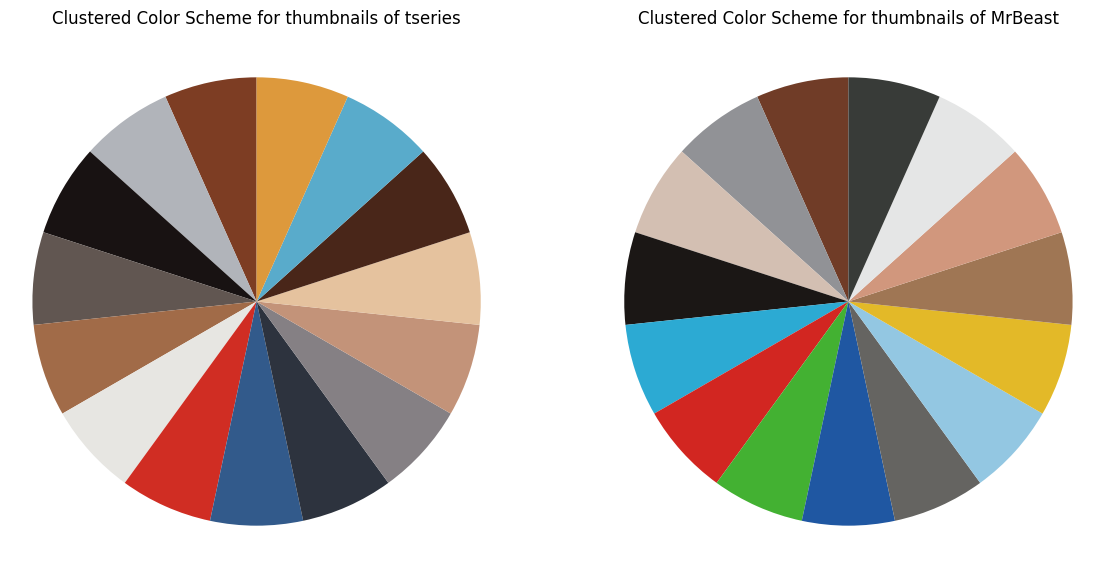

In [16]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Function to get colors from an image URL
def get_colors(image_url, resize=150):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).resize((resize, resize))
    img = img.convert('RGB')
    colors = img.getcolors(resize*resize)
    colors = [color[1] for color in colors if color[1] != (0, 0, 0)]  # Exclude black
    return colors

# Function to perform k-means clustering on color data
def cluster_colors(color_list, n_clusters=15):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(color_list)
    centroids = kmeans.cluster_centers_
    return centroids

# Aggregate colors from nm_df and rg_df, excluding black
ch2_colors = np.vstack([get_colors(url) for url in ch2_df['highQualityThumbnail']])
ch1_colors = np.vstack([get_colors(url) for url in ch1_df['highQualityThumbnail']])

# Perform k-means clustering
ch2_centroids = cluster_colors(ch2_colors)
ch1_centroids = cluster_colors(ch1_colors)

# Plot the clustered colors for nm_df
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie([1]*len(ch2_centroids), colors=[f'#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}' for c in ch2_centroids], startangle=90)
plt.axis('equal')
plt.title('Clustered Color Scheme for thumbnails of '+ Channel2)

# Plot the clustered colors for rg_df
plt.subplot(1, 2, 2)
plt.pie([1]*len(ch1_centroids), colors=[f'#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}' for c in ch1_centroids], startangle=90)
plt.axis('equal')
plt.title('Clustered Color Scheme for thumbnails of '+ Channel1)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


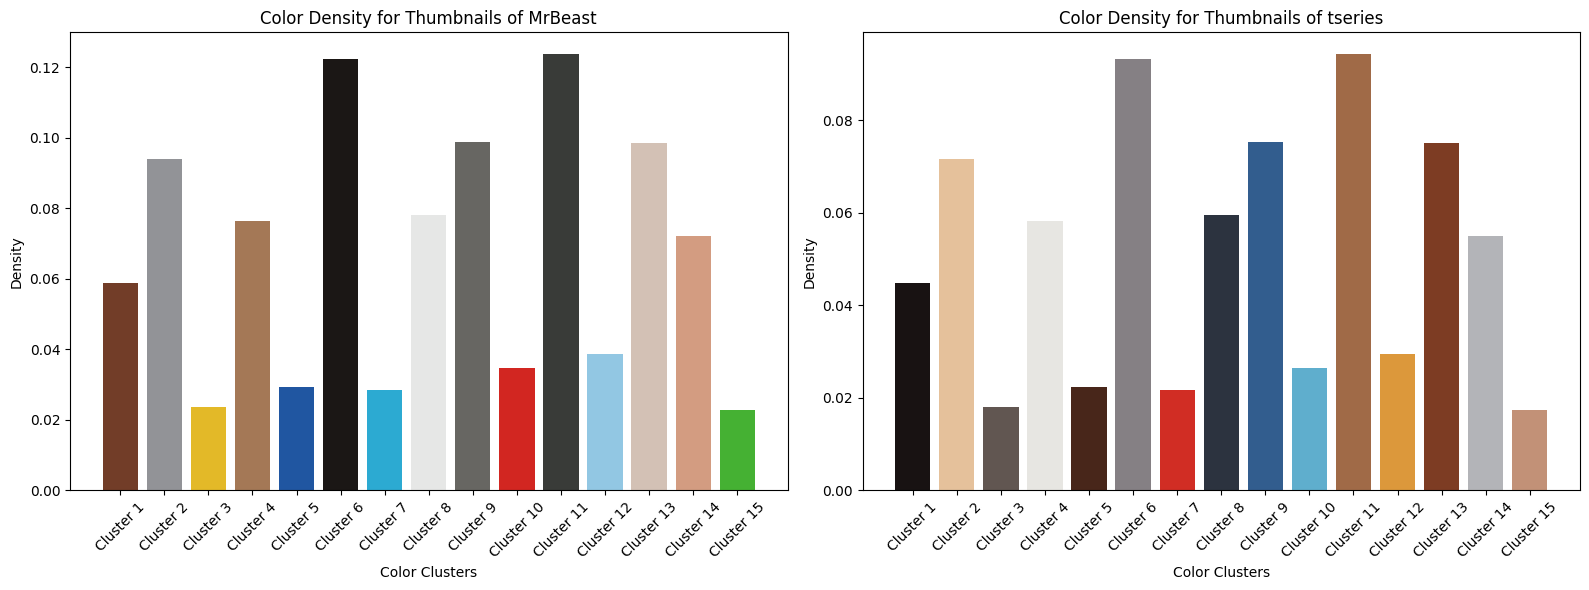

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO

# Function to get colors from an image URL
def get_colors(image_url, resize=150):
    response = requests.get(image_url)
    try:
      img = Image.open(BytesIO(response.content)).resize((resize, resize))
      img = img.convert('RGB')
      colors = img.getcolors(resize * resize)
      colors = [color[1] for color in colors if color[1] != (0, 0, 0)]  # Exclude black
      return colors
    except UnidentifiedImageError :
      print("Skipping "+ image_url + "UnidentifiedImageError")

# Function to perform k-means clustering on color data
def cluster_colors(color_list, n_clusters=15):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(color_list)
    centroids = kmeans.cluster_centers_
    return centroids

# Aggregate colors from nm_df and rg_df, excluding black
ch2_colors = np.vstack([get_colors(url) for url in ch2_df['highQualityThumbnail']])
ch1_colors = np.vstack([get_colors(url) for url in ch1_df['highQualityThumbnail']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=15)
kmeans.fit(ch2_colors)
ch2_centroids = kmeans.cluster_centers_

kmeans.fit(ch1_colors)
ch1_centroids = kmeans.cluster_centers_

# Calculate the density (proportion) of each color cluster
def calculate_density(centroids, color_list):
    total_pixels = len(color_list)
    cluster_sizes = [len(np.where(kmeans.labels_ == i)[0]) for i in range(len(centroids))]
    cluster_densities = [size / total_pixels for size in cluster_sizes]
    return cluster_densities

# Calculate densities for both channels
ch2_densities = calculate_density(ch2_centroids, ch2_colors)
ch1_densities = calculate_density(ch1_centroids, ch1_colors)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.bar(range(len(ch1_densities)), ch1_densities, color=[f'#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}' for c in ch1_centroids])
plt.xticks(range(len(ch1_densities)), [f'Cluster {i+1}' for i in range(len(ch1_densities))], rotation=45)
plt.xlabel('Color Clusters')
plt.ylabel('Density')
plt.title('Color Density for Thumbnails of ' + Channel1)

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.bar(range(len(ch2_densities)), ch2_densities, color=[f'#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}' for c in ch2_centroids])
plt.xticks(range(len(ch2_densities)), [f'Cluster {i+1}' for i in range(len(ch2_densities))], rotation=45)
plt.xlabel('Color Clusters')
plt.ylabel('Density')
plt.title('Color Density for Thumbnails of ' + Channel2)

plt.tight_layout()
plt.show()



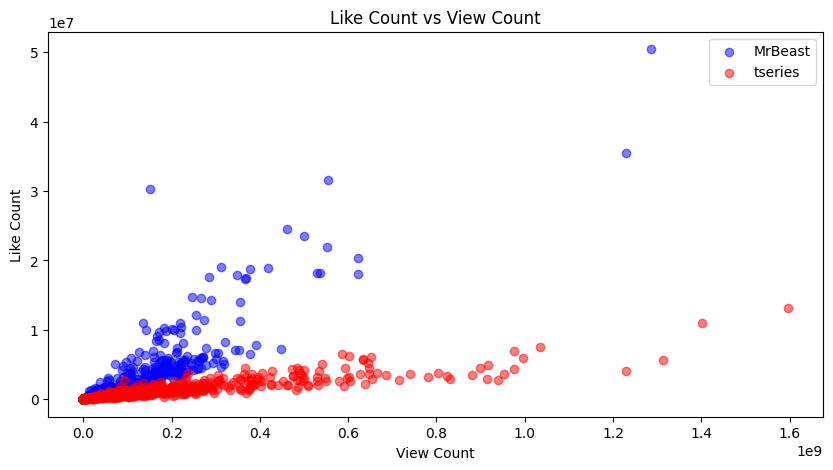

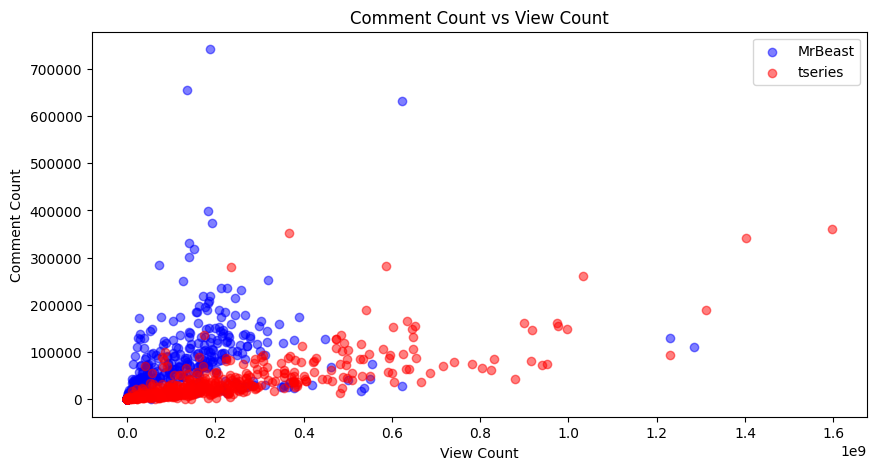

In [18]:
import matplotlib.pyplot as plt

# Assuming ch2_df and ch1_df are your DataFrames and they have 'viewCount', 'likeCount', and 'commentCount' columns

plt.figure(figsize=(10, 5))
# Plot like count against view count for rg_df
plt.scatter(ch1_df['viewCount'], ch1_df['likeCount'], color='blue',  label=Channel1, alpha=0.5)
# Plot like count against view count for ch2_df

plt.scatter(ch2_df['viewCount'], ch2_df['likeCount'], color='red',  label=Channel2, alpha=0.5)

# Adding titles and labels
plt.title('Like Count vs View Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.legend()
plt.show()

# Plot comment count against view count for nm_df
plt.figure(figsize=(10, 5))

# Plot comment count against view count for rg_df
plt.scatter(ch1_df['viewCount'], ch1_df['commentCount'], color='blue', label=Channel1, alpha=0.5)
plt.scatter(ch2_df['viewCount'], ch2_df['commentCount'], color='red', label=Channel2, alpha=0.5)

# Adding titles and labels
plt.title('Comment Count vs View Count')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.legend()
plt.show()


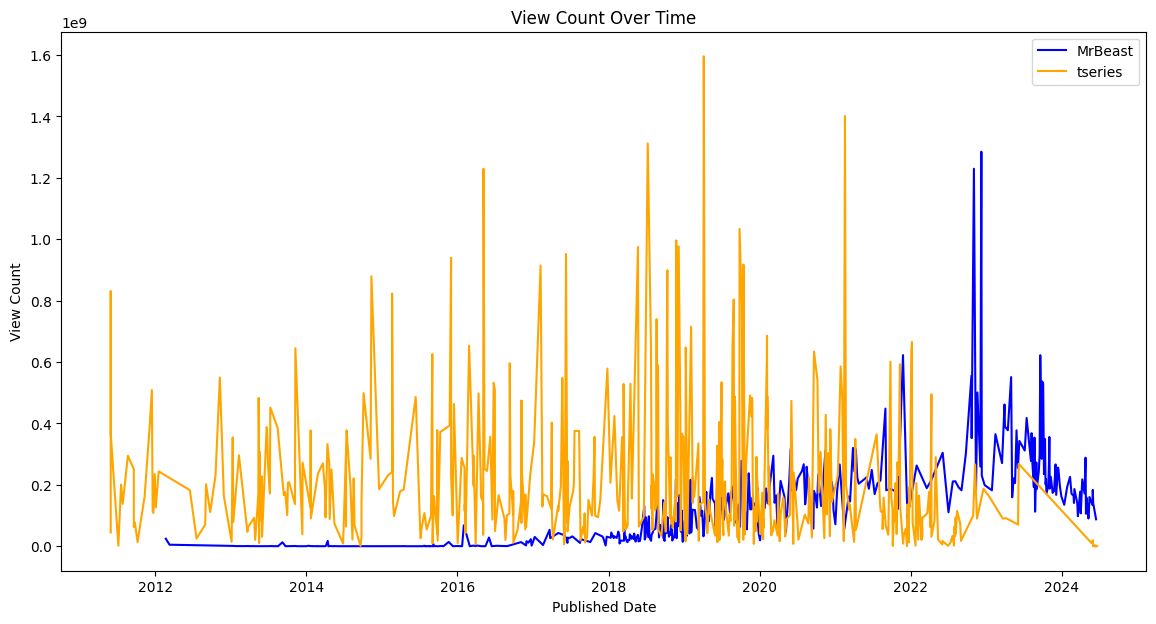

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming ch1_df and ch2_df are already defined with video data for MrBeast and T-Series respectively

# Convert the publishedAt column to datetime
ch1_df['publishedAt'] = pd.to_datetime(ch1_df['publishedAt'])
ch2_df['publishedAt'] = pd.to_datetime(ch2_df['publishedAt'])

# Convert viewCount to numeric, handling any missing or non-numeric values
ch1_df['viewCount'] = pd.to_numeric(ch1_df['viewCount'], errors='coerce')
ch2_df['viewCount'] = pd.to_numeric(ch2_df['viewCount'], errors='coerce')

# Sort dataframes by publishedAt
ch1_df.sort_values(by='publishedAt', inplace=True)
ch2_df.sort_values(by='publishedAt', inplace=True)

# Plotting
plt.figure(figsize=(14, 7))

# Plot MrBeast data
plt.plot(ch1_df['publishedAt'], ch1_df['viewCount'], color='blue', label=Channel1)

# Plot T-Series data
plt.plot(ch2_df['publishedAt'], ch2_df['viewCount'], color='orange', label=Channel2)

# Labels and title
plt.xlabel('Published Date')
plt.ylabel('View Count')
plt.title('View Count Over Time')
plt.legend()

# Show plot
plt.show()


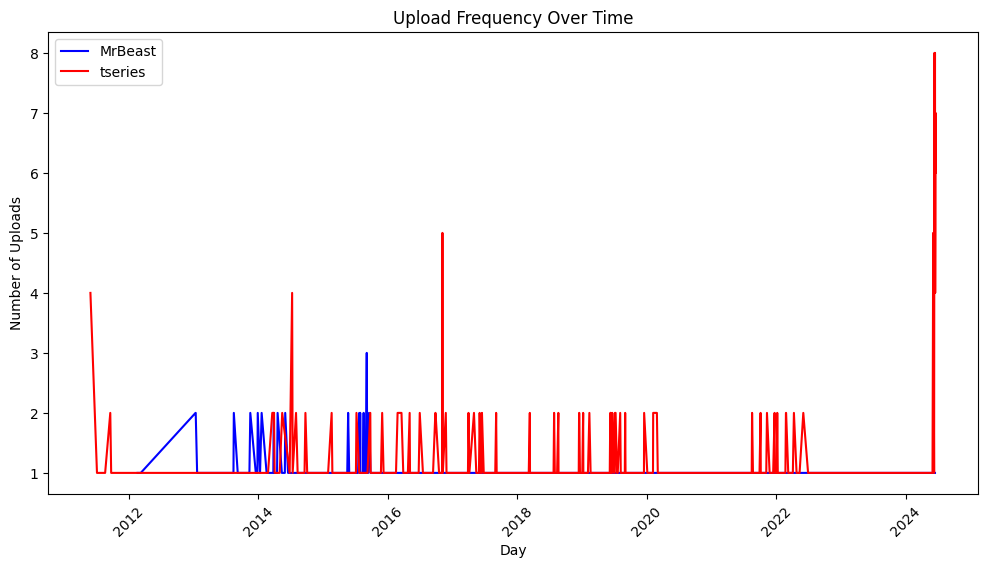

In [20]:
# Convert 'publishedAt' to datetime
ch1_df['publishedAt'] = pd.to_datetime(ch1_df['publishedAt'])
ch2_df['publishedAt'] = pd.to_datetime(ch2_df['publishedAt'])

# Extract day
ch1_df['day'] = ch1_df['publishedAt'].dt.date
ch2_df['day'] = ch2_df['publishedAt'].dt.date

# Calculate upload frequency
ch1_upload_freq = ch1_df['day'].value_counts().sort_index()
ch2_upload_freq = ch2_df['day'].value_counts().sort_index()

# Plot upload frequency over time
plt.figure(figsize=(12, 6))
plt.plot(ch1_upload_freq, label=Channel1, color='blue')
plt.plot(ch2_upload_freq, label=Channel2, color='red')
plt.title('Upload Frequency Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Uploads')
plt.legend()
plt.xticks(rotation=45)
plt.show()

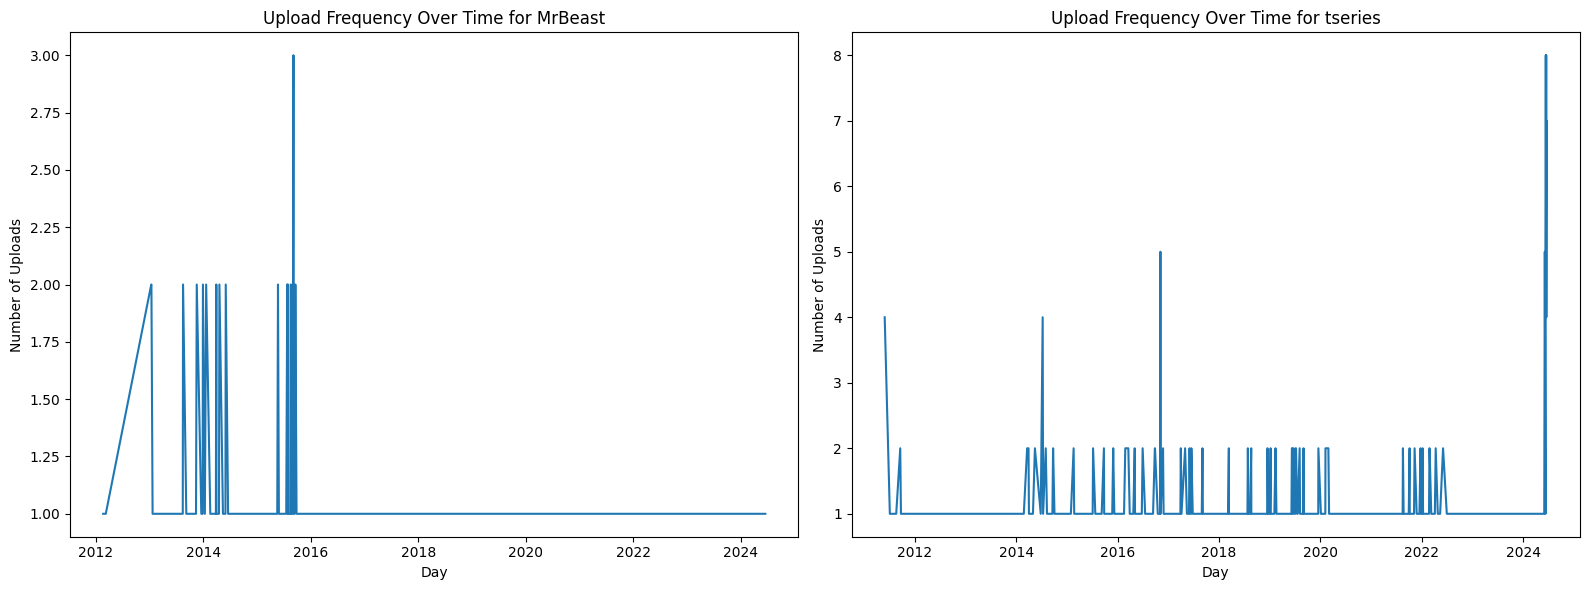

In [21]:
import seaborn as sns

def plot_upload_frequency(videos, channel_name, ax):
    upload_times = pd.to_datetime(videos['publishedAt']).dt.date
    upload_freq = upload_times.value_counts().sort_index()
    ax.plot(upload_freq, label=channel_name)
    ax.set_title(f'Upload Frequency Over Time for {channel_name}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Uploads')

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

plot_upload_frequency(ch1_df, Channel1, axs[0])

plot_upload_frequency(ch2_df, Channel2, axs[1])

plt.tight_layout()
plt.show()


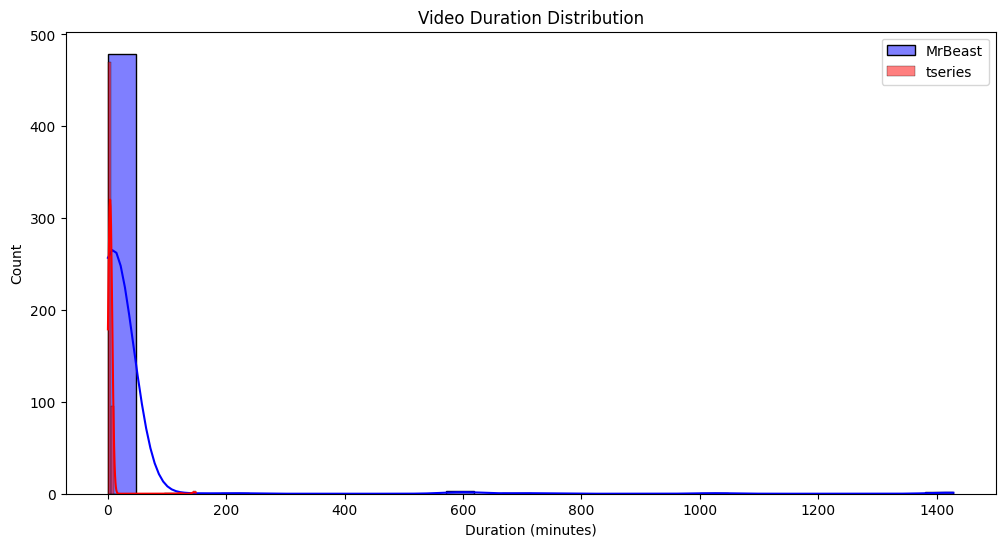

In [22]:
def convert_duration(duration):
    return pd.to_timedelta(duration)

ch1_df['duration'] = ch1_df['duration'].apply(convert_duration)
ch2_df['duration'] = ch2_df['duration'].apply(convert_duration)

plt.figure(figsize=(12, 6))
sns.histplot(ch1_df['duration'].dt.total_seconds()/60, bins=30, color='blue', label=Channel1, kde=True)
sns.histplot(ch2_df['duration'].dt.total_seconds()/60, bins=30, color='red', label=Channel2, kde=True)
plt.xlabel('Duration (minutes)')
plt.title('Video Duration Distribution')
plt.legend()
plt.show()


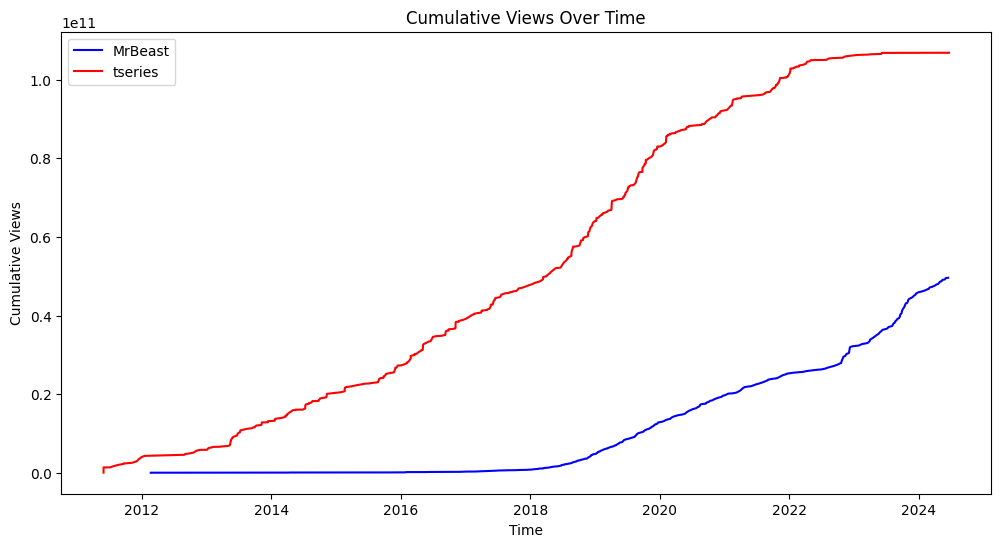

In [23]:
ch1_df = ch1_df.sort_values('publishedAt')
ch2_df = ch2_df.sort_values('publishedAt')

ch1_df['cumulative_views'] = ch1_df['viewCount'].astype(int).cumsum()
ch2_df['cumulative_views'] = ch2_df['viewCount'].astype(int).cumsum()

plt.figure(figsize=(12, 6))
plt.plot(ch1_df['publishedAt'], ch1_df['cumulative_views'], label=Channel1, color='blue')
plt.plot(ch2_df['publishedAt'], ch2_df['cumulative_views'], label=Channel2, color='red')
plt.title('Cumulative Views Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Views')
plt.legend()
plt.show()


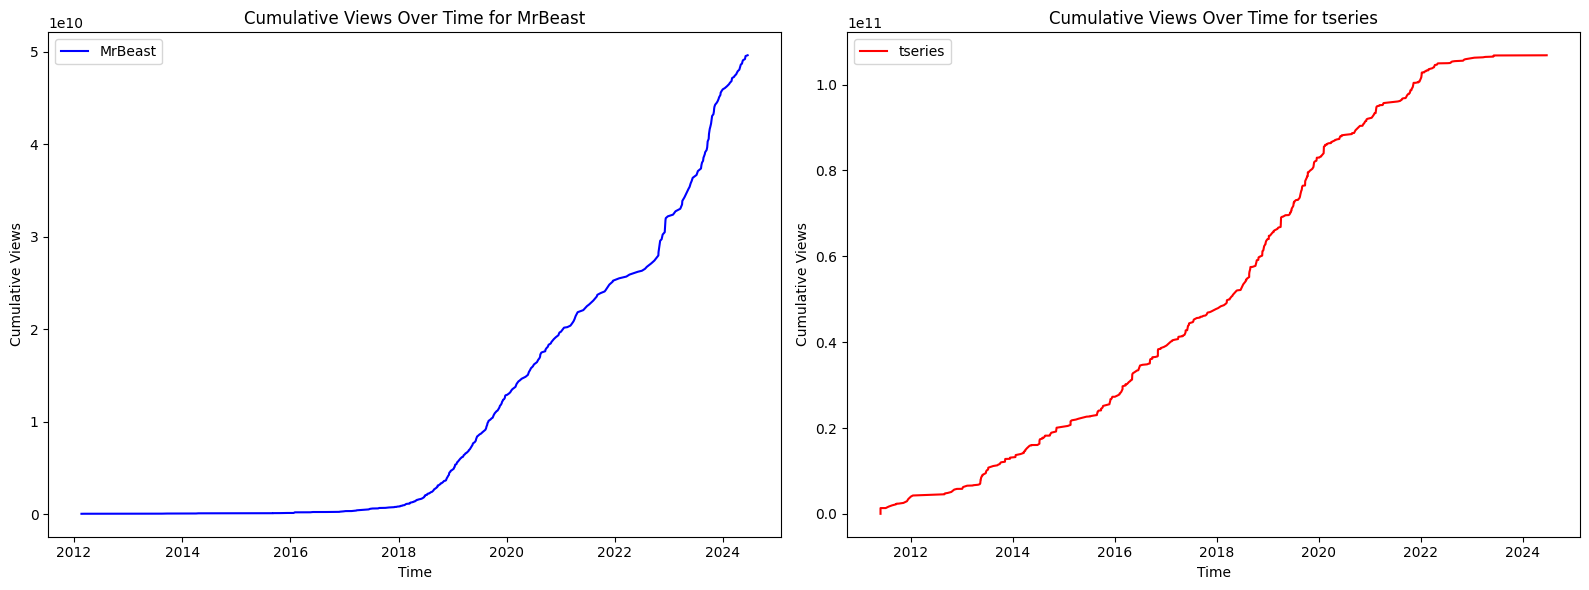

In [24]:


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Channel1
axs[0].plot(ch1_df['publishedAt'], ch1_df['cumulative_views'], label=Channel1, color='blue')
axs[0].set_title('Cumulative Views Over Time for ' + Channel1)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Cumulative Views')
axs[0].legend()

# Plot for Channel2
axs[1].plot(ch2_df['publishedAt'], ch2_df['cumulative_views'], label=Channel2, color='red')
axs[1].set_title('Cumulative Views Over Time for ' + Channel2)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Cumulative Views')
axs[1].legend()

plt.tight_layout()
plt.show()


In [25]:
# from collections import Counter

# ch1_tags = Counter([tag for tags in ch1_df['tags'].dropna() for tag in tags])
# ch2_tags = Counter([tag for tags in ch2_df['tags'].dropna() for tag in tags])

# ch1_tags_common = ch1_tags.most_common(10)
# ch2_tags_common = ch2_tags.most_common(10)

# ch1_tags_df = pd.DataFrame(ch1_tags_common, columns=['Tag', 'Count'])
# ch2_tags_df = pd.DataFrame(ch2_tags_common, columns=['Tag', 'Count'])

# plt.figure(figsize=(14, 6))
# plt.subplot(1, 2, 1)
# sns.barplot(x='Count', y='Tag', data=ch1_tags_df, palette='Blues_d')
# plt.title('Top 10 Tags for ' + Channel1)

# plt.subplot(1, 2, 2)
# sns.barplot(x='Count', y='Tag', data=ch2_tags_df, palette='Reds_d')
# plt.title('Top 10 Tags for ' + Channel2)

# plt.show()


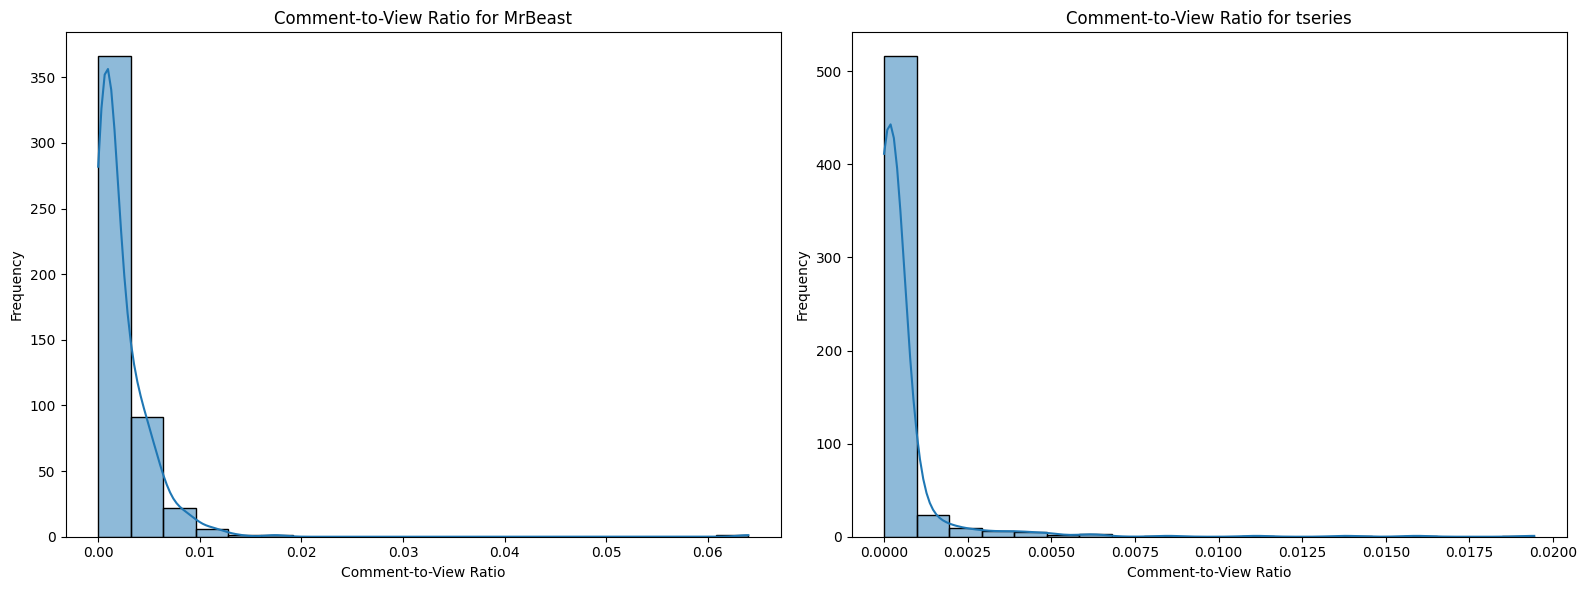

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_comment_to_view_ratio(videos, channel_name, ax):
    comment_to_view_ratio = videos['commentCount'] / videos['viewCount']
    sns.histplot(comment_to_view_ratio, bins=20, kde=True, ax=ax)
    ax.set_title(f'Comment-to-View Ratio for {channel_name}')
    ax.set_xlabel('Comment-to-View Ratio')
    ax.set_ylabel('Frequency')


fig, axs = plt.subplots(1, 2, figsize=(16, 6))

plot_comment_to_view_ratio(ch1_df, Channel1, axs[0])
plot_comment_to_view_ratio(ch2_df, Channel2, axs[1])

plt.tight_layout()
plt.show()


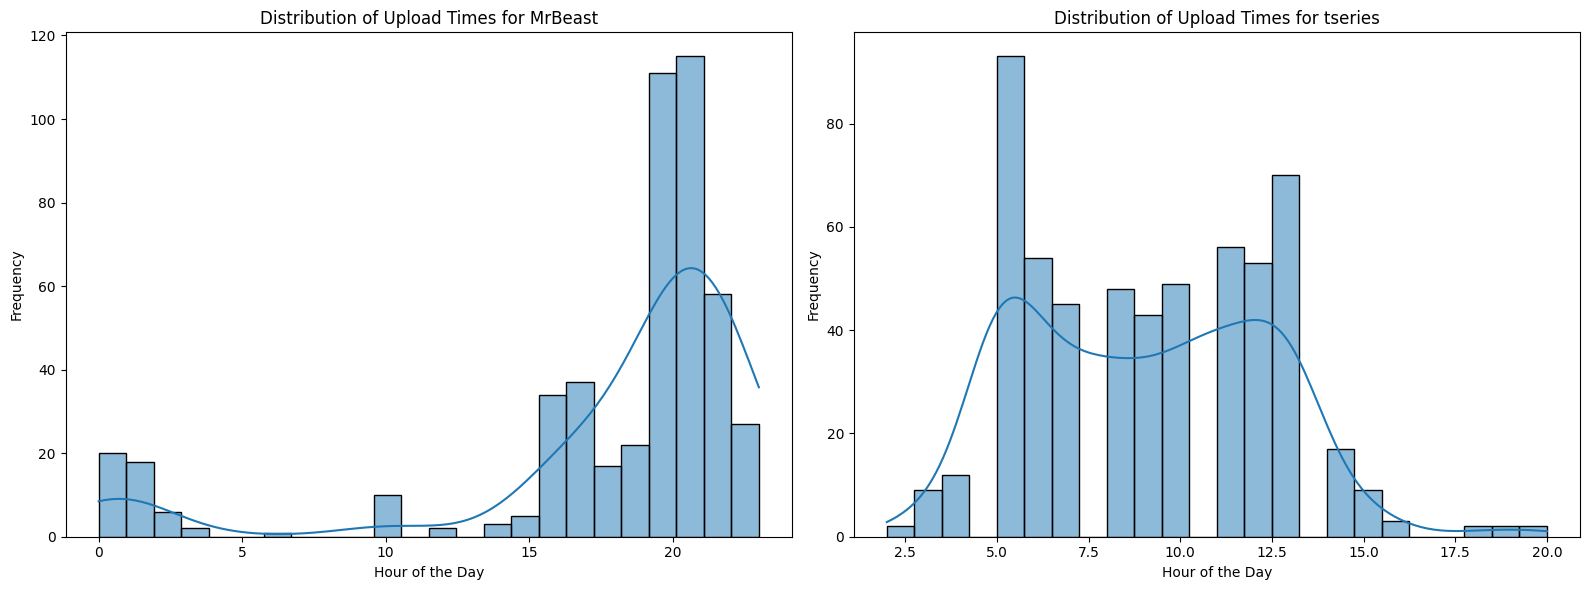

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_upload_times(videos, channel_name, ax):
    upload_times = pd.to_datetime(videos['publishedAt']).dt.hour
    sns.histplot(upload_times, bins=24, kde=True, ax=ax)
    ax.set_title(f'Distribution of Upload Times for {channel_name}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Frequency')


fig, axs = plt.subplots(1, 2, figsize=(16, 6))

plot_upload_times(ch1_df, Channel1, axs[0])

plot_upload_times(ch2_df, Channel2, axs[1])

plt.tight_layout()
plt.show()


In [28]:
ch2_df['ageRestricted'].value_counts()

ageRestricted
False    568
True       1
Name: count, dtype: int64

<ipython-input-29-bfbc54e289a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_restricted, palette='Set2')


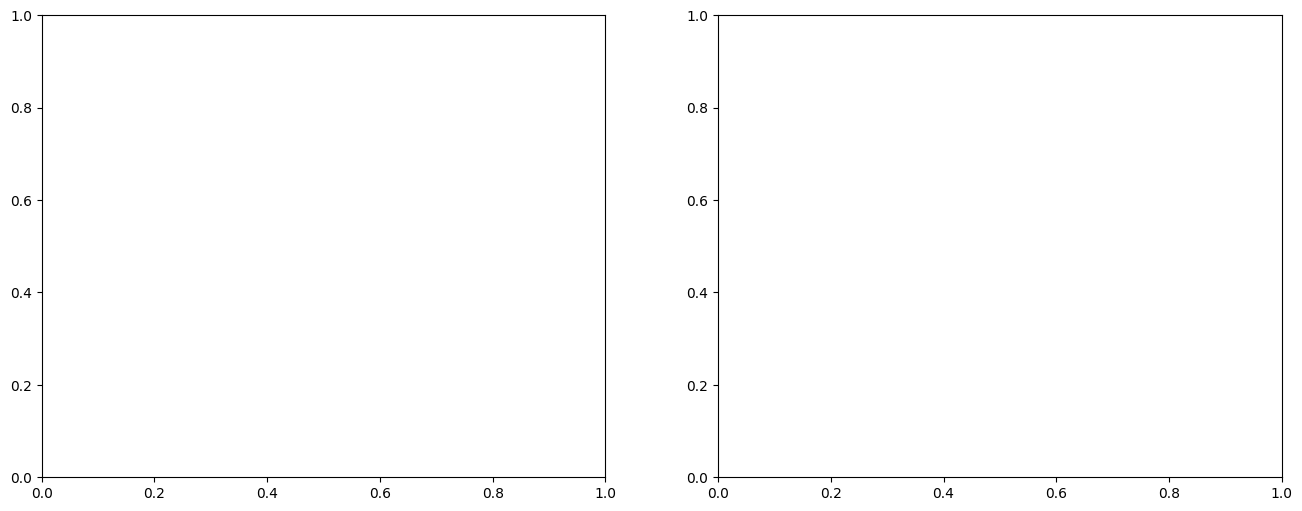

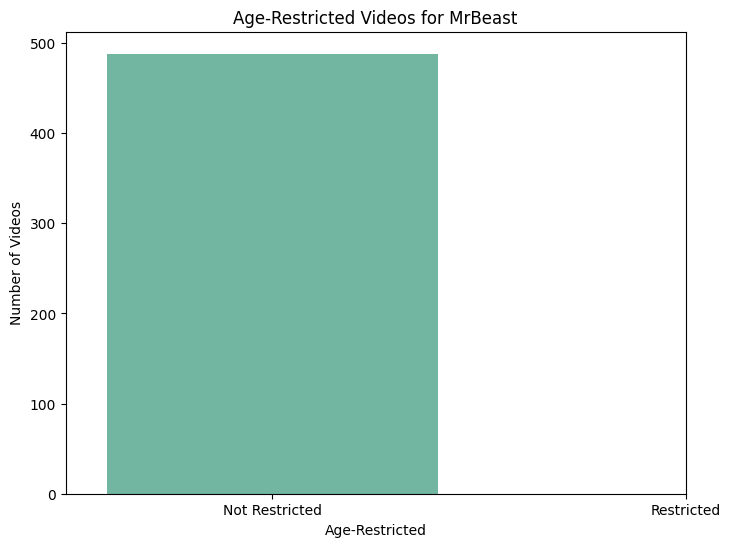

<ipython-input-29-bfbc54e289a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=age_restricted, palette='Set2')


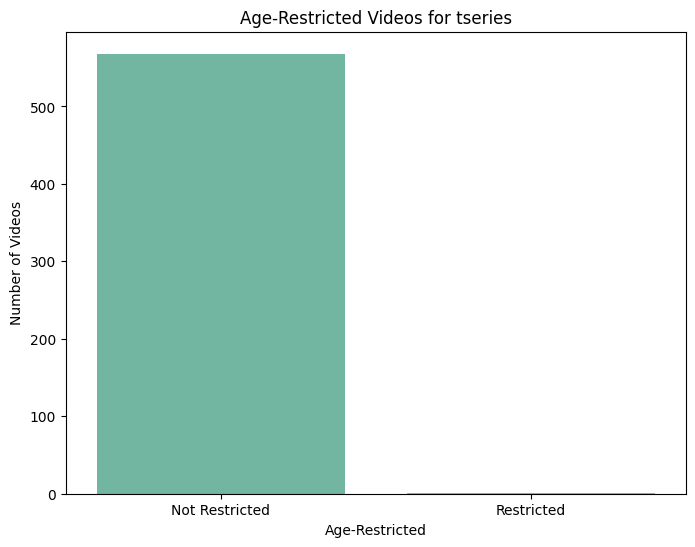

<Figure size 640x480 with 0 Axes>

In [29]:
def plot_age_restricted(videos, channel_name):
    age_restricted = videos['ageRestricted']
    plt.figure(figsize=(8, 6))
    sns.countplot(x=age_restricted, palette='Set2')
    plt.title(f'Age-Restricted Videos for {channel_name}')
    plt.xlabel('Age-Restricted')
    plt.ylabel('Number of Videos')
    plt.xticks(ticks=[0, 1], labels=['Not Restricted', 'Restricted'])
    plt.show()

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

plot_age_restricted(ch1_df, Channel1)

plot_age_restricted(ch2_df, Channel2)

plt.tight_layout()
plt.show()


# Data from Social Blade

In [30]:
# import os
# import csv
# import requests
# from datetime import datetime


# CHANNEL_ID1 = get_channel_id(api_key, Channel1)
# CHANNEL_ID2 = channel_id = get_channel_id(api_key, Channel2)

# def get_subscriber_count(channel_id):
#     url = f'https://www.googleapis.com/youtube/v3/channels?part=statistics&id={channel_id}&key={api_key}'
#     response = requests.get(url)
#     data = response.json()
#     return int(data['items'][0]['statistics']['subscriberCount'])

# def write_subscriber_data(file_name, channel_id, channel_name):
#     subscriber_count = get_subscriber_count(channel_id)
#     timestamp = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')

#     file_exists = os.path.isfile(file_name)

#     with open(file_name, mode='a', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)

#         # Write the header if the file is being created
#         if not file_exists:
#             writer.writerow(['timestamp', 'channel_name', 'subscriber_count'])

#         # Write the subscriber data
#         writer.writerow([timestamp, channel_name, subscriber_count])

# write_subscriber_data('channel1_subscribers.csv', CHANNEL_ID1, Channel1)
# write_subscriber_data('channel2_subscribers.csv', CHANNEL_ID2, Channel2)


In [31]:
import pandas as pd

# Provided data
data = {
    'DATE': ['2024-05-03 Fri', '2024-05-04 Sat', '2024-05-05 Sun', '2024-05-06 Mon', '2024-05-07 Tue', '2024-05-08 Wed', '2024-05-09 Thu', '2024-05-10 Fri', '2024-05-11 Sat', '2024-05-12 Sun', '2024-05-13 Mon', '2024-05-14 Tue', '2024-05-15 Wed', '2024-05-16 Thu', '2024-05-17 Fri', '2024-05-18 Sat', '2024-05-19 Sun', '2024-05-20 Mon', '2024-05-21 Tue', '2024-05-22 Wed', '2024-05-23 Thu', '2024-05-24 Fri', '2024-05-25 Sat', '2024-05-26 Sun', '2024-05-27 Mon', '2024-05-28 Tue', '2024-05-29 Wed', '2024-05-30 Thu', '2024-05-31 Fri'],
    'SUBSCRIBERS': ['264M', '264M', '264M', '264M', '264M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '265M', '266M', '266M', '266M', '266M', '266M', '266M', '266M', '266M', '266M'],
    'VIDEO VIEWS': ['+202,103,723', '+98,560,795', '254,081,777,810', '+175,458,256', '+5,852,089', '+90,181,538', '+189,434,343', '+10,309,903', '+97,407,298', '+89,182,937', '+92,402,650', '+173,730,715', '+89,801,306', '255,095,538,845', '+177,639,706', '+95,182,211', '+93,111,310', '+98,543,544', '+76,104,241', '255,636,119,857', '+198,616,155', '+95,937,528', '255,930,673,540', '+112,880,813', '+176,415,163', '256,219,969,516', '+179,224,941', '+103,052,471', '256,502,246,928'],
    'ESTIMATED EARNINGS': ['$50.5K - $808.4K', '$24.6K - $394.2K', '$0 - $0', '$43.9K - $701.8K', '$1.5K - $23.4K', '$22.5K - $360.7K', '$47.4K - $757.7K', '$2.6K - $41.2K', '$24.4K - $389.6K', '$22.3K - $356.7K', '$23.1K - $369.6K', '$43.4K - $694.9K', '$22.5K - $359.2K', '$0 - $0', '$44.4K - $710.6K', '$23.8K - $380.7K', '$23.3K - $372.4K', '$24.6K - $394.2K', '$19K - $304.4K', '$0 - $0', '$49.7K - $794.5K', '$24K - $383.8K', '$0 - $0', '$28.2K - $451.5K', '$44.1K - $705.7K', '$0 - $0', '$44.8K - $716.9K', '$25.8K - $412.2K', '$0 - $0']
}

# Create a DataFrame
ch2_subscribers = pd.DataFrame(data)

# Save the DataFrame to a CSV file
ch2_subscribers.to_csv('ch2_subscribers.csv', index=False)
ch2_subscribers.head()

,DATE,SUBSCRIBERS,VIDEO VIEWS,ESTIMATED EARNINGS
0,2024-05-03 Fri,264M,"+202,103,723",$50.5K - $808.4K
1,2024-05-04 Sat,264M,"+98,560,795",$24.6K - $394.2K
2,2024-05-05 Sun,264M,"254,081,777,810",$0 - $0
3,2024-05-06 Mon,264M,"+175,458,256",$43.9K - $701.8K
4,2024-05-07 Tue,264M,"+5,852,089",$1.5K - $23.4K


In [32]:
import pandas as pd

# Provided data
data = {
    'DATE': ['2024-05-03 Fri', '2024-05-04 Sat', '2024-05-05 Sun', '2024-05-06 Mon', '2024-05-07 Tue', '2024-05-08 Wed', '2024-05-09 Thu', '2024-05-10 Fri', '2024-05-11 Sat', '2024-05-12 Sun', '2024-05-13 Mon', '2024-05-14 Tue', '2024-05-15 Wed', '2024-05-16 Thu', '2024-05-17 Fri', '2024-05-18 Sat', '2024-05-19 Sun', '2024-05-20 Mon', '2024-05-21 Tue', '2024-05-22 Wed', '2024-05-23 Thu', '2024-05-24 Fri', '2024-05-25 Sat', '2024-05-26 Sun', '2024-05-27 Mon', '2024-05-28 Tue', '2024-05-29 Wed', '2024-05-30 Thu', '2024-05-31 Fri'],
    'SUBSCRIBERS': ['255M', '256M', '256M', '256M', '256M', '256M', '256M', '257M', '257M', '257M', '257M', '257M', '257M', '258M', '258M', '258M', '258M', '259M', '259M', '259M', '260M', '260M', '260M', '261M', '261M', '262M', '263M', '264M', '265M'],
    'VIDEO VIEWS': ['+116,363,115', '+79,363,858', '48,077,499,030', '+109,604,019', '+4,703,289', '+98,603,868', '+58,542,920', '+12,810,619', '+40,483,831', '+172,622,982', '48,574,870,558', '+123,315,993', '48,698,186,551', '+133,432,719', '48,831,619,270', '+182,124,365', '+81,303,351', '+57,786,777', '+9,909,811', '+39,523,357', '+70,856,459', '+124,959,083', '49,398,082,473', '+407,813,804', '+6,086,105', '+102,852,309', '+75,757,368', '+60,381,561', '+96,583,017'],
    'ESTIMATED EARNINGS': ['$29.1K - $465.5K', '$19.8K - $317.5K', '$0 - $0', '$27.4K - $438.4K', '$1.2K - $18.8K', '$24.7K - $394.4K', '$14.6K - $234.2K', '$3.2K - $51.2K', '$10.1K - $161.9K', '$43.2K - $690.5K', '$0 - $0', '$30.8K - $493.3K', '$0 - $0', '$33.4K - $533.7K', '$0 - $0', '$45.5K - $728.5K', '$20.3K - $325.2K', '$14.4K - $231.1K', '$2.5K - $39.6K', '$9.9K - $158.1K', '$17.7K - $283.4K', '$31.2K - $499.8K', '$0 - $0', '$102K - $1.6M', '$1.5K - $24.3K', '$25.7K - $411.4K', '$18.9K - $303K', '$15.1K - $241.5K', '$24.1K - $386.3K']
}
lengths = {key: len(value) for key, value in data.items()}
print(lengths)
# Create a DataFrame
ch1_subscribers = pd.DataFrame(data)

# Save the DataFrame to a CSV file
ch1_subscribers.to_csv('ch1_subscribers.csv', index=False)


{'DATE': 29, 'SUBSCRIBERS': 29, 'VIDEO VIEWS': 29, 'ESTIMATED EARNINGS': 29}


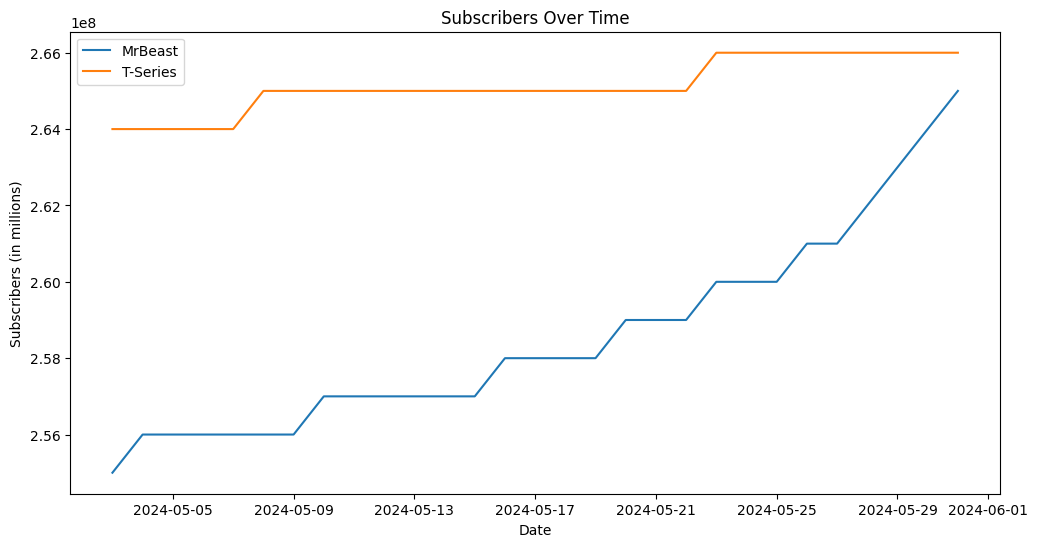

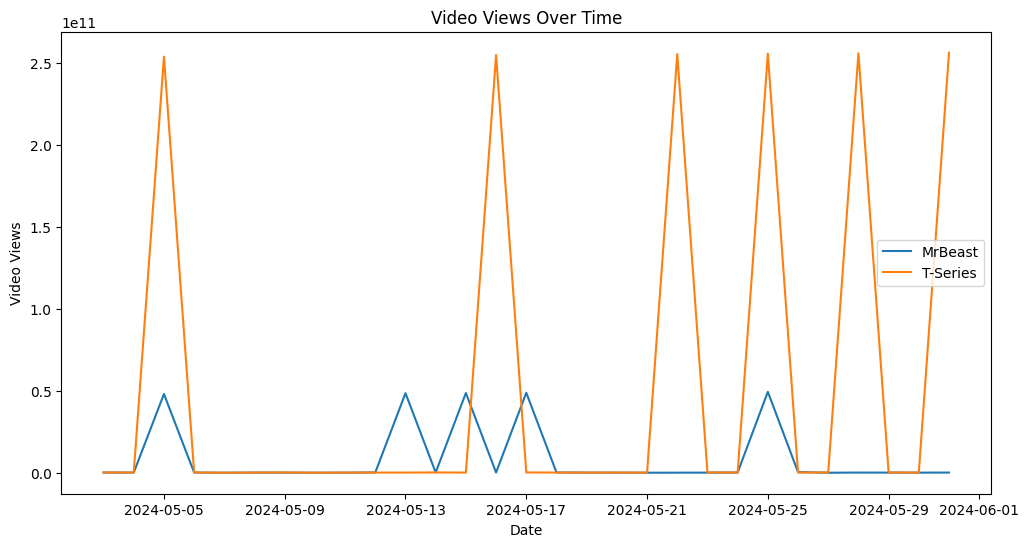

In [33]:
import matplotlib.pyplot as plt

# Convert subscribers and video views to numeric values
ch1_subscribers['SUBSCRIBERS'] = ch1_subscribers['SUBSCRIBERS'].str.replace('M', 'e6').astype(float)
ch1_subscribers['VIDEO VIEWS'] = ch1_subscribers['VIDEO VIEWS'].replace('+', '0').str.replace(',', '').astype(float)

ch2_subscribers['SUBSCRIBERS'] = ch2_subscribers['SUBSCRIBERS'].str.replace('M', 'e6').astype(float)
ch2_subscribers['VIDEO VIEWS'] = ch2_subscribers['VIDEO VIEWS'].replace('+', '0').str.replace(',', '').astype(float)

# Convert date to datetime
ch1_subscribers['DATE'] = pd.to_datetime(ch1_subscribers['DATE'])
ch2_subscribers['DATE'] = pd.to_datetime(ch2_subscribers['DATE'])

# Create line plots for subscribers
plt.figure(figsize=(12, 6))
plt.plot(ch1_subscribers['DATE'], ch1_subscribers['SUBSCRIBERS'], label='MrBeast')
plt.plot(ch2_subscribers['DATE'], ch2_subscribers['SUBSCRIBERS'], label='T-Series')
plt.xlabel('Date')
plt.ylabel('Subscribers (in millions)')
plt.title('Subscribers Over Time')
plt.legend()
plt.show()

# Create line plots for video views
plt.figure(figsize=(12, 6))
plt.plot(ch1_subscribers['DATE'], ch1_subscribers['VIDEO VIEWS'], label='MrBeast')
plt.plot(ch2_subscribers['DATE'], ch2_subscribers['VIDEO VIEWS'], label='T-Series')
plt.xlabel('Date')
plt.ylabel('Video Views')
plt.title('Video Views Over Time')
plt.legend()
plt.show()


# Forensic Analyiss - Benfords Law

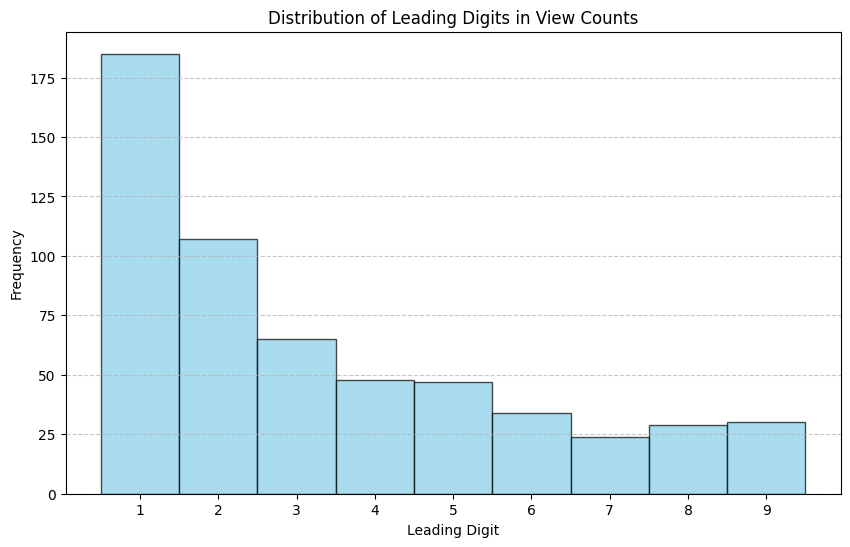

Z-score:
LEADING_DIGIT
1    2.326893
2    0.836493
3    0.033969
4   -0.290862
5   -0.309969
6   -0.558369
7   -0.749446
8   -0.653908
9   -0.634800
Name: proportion, dtype: float64

Chi-square value: 0.011577787055805838
P-value: 0.9999999999534243


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Load the dataset
df = ch2_df

# Extract leading digits
df['LEADING_DIGIT'] = df['viewCount'].astype(str).str[0].astype(int)

# Calculate observed frequencies
observed_freq = df['LEADING_DIGIT'].value_counts(normalize=True).sort_index()

# Calculate expected frequencies according to Benford's Law
benfords_law = np.log10(1 + 1 / np.arange(1, 10))
expected_freq = pd.Series(benfords_law, index=range(1, 10))

# Calculate z-score
obs_mean = observed_freq.mean()
obs_std = observed_freq.std()
z_score = (observed_freq - obs_mean) / obs_std

# Perform chi-square test
chi_sq, p_val = stats.chisquare(observed_freq, f_exp=expected_freq)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['LEADING_DIGIT'], bins=range(1, 11), align='left', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Leading Digits in View Counts'+Channel2 )
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Z-score:\n{z_score}\n")
print(f"Chi-square value: {chi_sq}")
print(f"P-value: {p_val}")


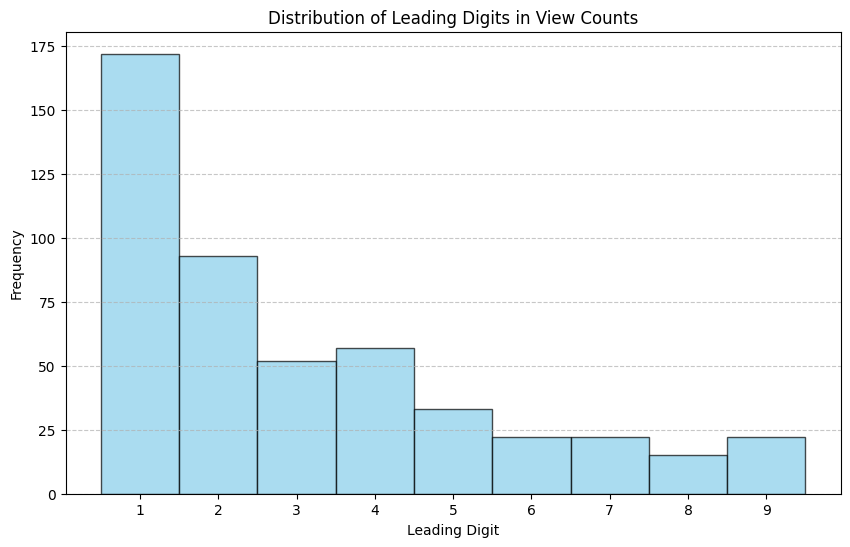

Z-score:
LEADING_DIGIT
1    2.326893
2    0.836493
3    0.033969
4   -0.290862
5   -0.309969
6   -0.558369
7   -0.749446
8   -0.653908
9   -0.634800
Name: proportion, dtype: float64

Chi-square value: 0.011577787055805838
P-value: 0.9999999999534243


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Load the dataset
df = ch1_df
# Extract leading digits
df['LEADING_DIGIT'] = df['viewCount'].astype(str).str[0].astype(int)

# Ensure observed frequencies cover all leading digits from 1 to 9
observed_freq = observed_freq.reindex(range(1, 10), fill_value=0)

# Calculate z-score
obs_mean = observed_freq.mean()
obs_std = observed_freq.std()
z_score = (observed_freq - obs_mean) / obs_std

# Perform chi-square test
chi_sq, p_val = stats.chisquare(observed_freq, f_exp=expected_freq)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['LEADING_DIGIT'], bins=range(1, 11), align='left', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Leading Digits in View Counts'+Channel2)
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Z-score:\n{z_score}\n")
print(f"Chi-square value: {chi_sq}")
print(f"P-value: {p_val}")



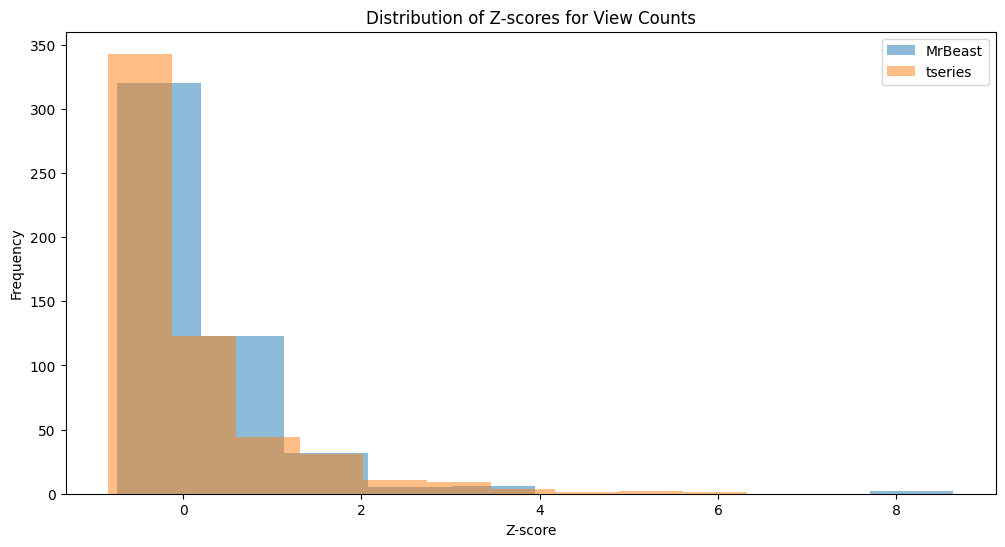

In [36]:
# Calculate z-score for view counts in ch1_df
mean_ch1 = ch1_df['viewCount'].mean()
std_ch1 = ch1_df['viewCount'].std()
ch1_df['viewCount_zscore'] = (ch1_df['viewCount'] - mean_ch1) / std_ch1

# Calculate z-score for view counts in ch2_df
mean_ch2 = ch2_df['viewCount'].mean()
std_ch2 = ch2_df['viewCount'].std()
ch2_df['viewCount_zscore'] = (ch2_df['viewCount'] - mean_ch2) / std_ch2

# Plot the distribution of z-scores for ch1_df and ch2_df
plt.figure(figsize=(12, 6))
plt.hist(ch1_df['viewCount_zscore'], bins=10, alpha=0.5, label=Channel1)
plt.hist(ch2_df['viewCount_zscore'], bins=10, alpha=0.5, label=Channel2)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-scores for View Counts')
plt.legend()
plt.show()

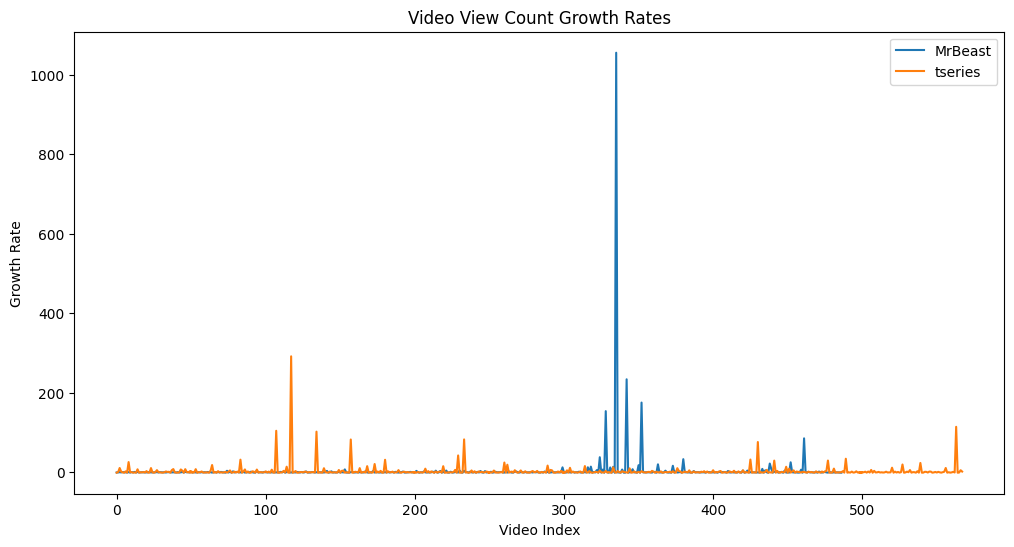

In [37]:
# Calculate growth rate for ch1_df
ch1_df['growth_rate'] = ch1_df['viewCount'].pct_change()

# Calculate growth rate for ch2_df
ch2_df['growth_rate'] = ch2_df['viewCount'].pct_change()

# Plot growth rates for comparison
plt.figure(figsize=(12, 6))
plt.plot(ch1_df['growth_rate'], label=Channel1)
plt.plot(ch2_df['growth_rate'], label=Channel2)
plt.xlabel('Video Index')
plt.ylabel('Growth Rate')
plt.title('Video View Count Growth Rates')
plt.legend()
plt.show()

#note it just shows the change if the view count is high and change is low it will be flat next graph will solve the huge variation


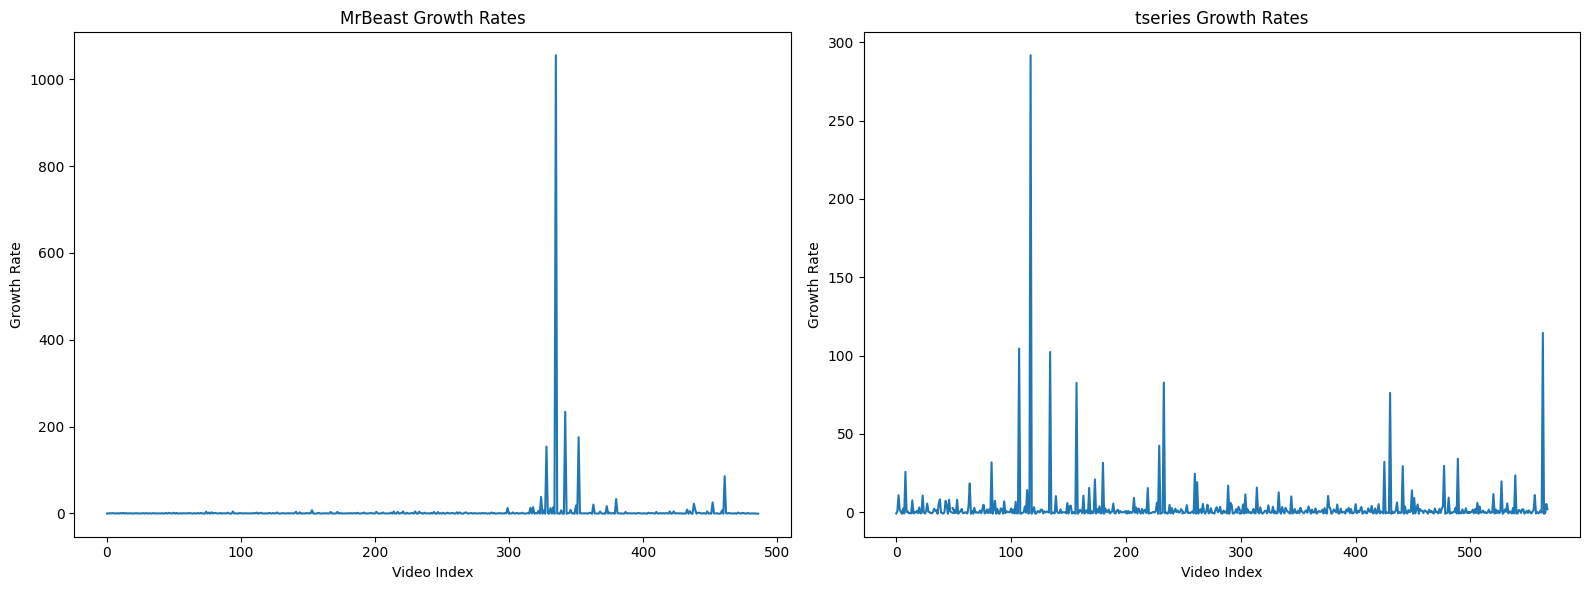

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot growth rates for ch1_df
axs[0].plot(ch1_df['growth_rate'], label=Channel1)
axs[0].set_title(Channel1+' Growth Rates')
axs[0].set_xlabel('Video Index')
axs[0].set_ylabel('Growth Rate')

# Plot growth rates for ch2_df
axs[1].plot(ch2_df['growth_rate'], label=Channel2)
axs[1].set_title(Channel2+' Growth Rates')
axs[1].set_xlabel('Video Index')
axs[1].set_ylabel('Growth Rate')

plt.tight_layout()
plt.show()


In [39]:
ch2_df.head(30)

,videoId,title,description,publishedAt,channelTitle,highQualityThumbnail,likeCount,tags,defaultAudioLanguage,dislikeCount,viewCount,commentCount,duration,ageRestricted,day,cumulative_views,LEADING_DIGIT,viewCount_zscore,growth_rate
568,pKGiJ8f0w6Q,MAINE CHUN LIYA Full Video | Dil Maange More |...,Song - MAINE CHUN LIYA\nFilm - Dil Maange Mor...,2011-05-30 13:20:30+00:00,T-Series,https://img.youtube.com/vi/pKGiJ8f0w6Q/hqdefau...,210773,"['Tumne Chahe Kaha Na', 'Chun Liya', 'Dil Maan...",hi,0,44798374,3908,0 days 00:04:10,False,2011-05-30,44798374,4,-0.641558,NaN
567,4Y9RzwXKEWM,Main Ishq Uska [Full Song] Vaada,Song - Main Ishq Uska\nFilm - Vaada\nSinger - ...,2011-05-30 13:22:50+00:00,T-Series,https://img.youtube.com/vi/4Y9RzwXKEWM/hqdefau...,447170,"['Main Ishq Uska', 'Vaada', 'Babul Supriyo', '...",hi,0,132029795,9327,0 days 00:04:18,False,2011-05-30,176828169,1,-0.250083,1.947201
566,bhRswBsogNw,Full Video: Papa Mere Papa | Main Aisa Hi Hoon...,"Presenting the full video song ""Papa Mere Papa...",2011-05-30 13:28:30+00:00,T-Series,https://img.youtube.com/vi/bhRswBsogNw/hqdefau...,2907715,"['Dil Mera Todo Na', 'Main Aisa Hi Hoon', 'Son...",hi,0,831523895,86235,0 days 00:04:23,False,2011-05-30,1008352064,8,2.889092,5.298002
565,vN_7VqXe_0U,Full Video: Tere Ishq Mein Pagal Ho Gaya | Hum...,"Presenting the full video song "" Tere Ishq Mei...",2011-05-30 13:30:28+00:00,T-Series,https://img.youtube.com/vi/vN_7VqXe_0U/hqdefau...,923870,"['Humko Tumse Pyaar Hai', 'Udit Narayan', 'Alk...",hi,0,367715269,34693,0 days 00:05:47,False,2011-05-30,1376067333,3,0.807622,-0.557781
564,E46OlVKR_J0,"''Saathiya"" Singham Video Song | Feat. Ajay De...",Saathiya is the new video song of movie Singha...,2011-07-06 13:33:22+00:00,T-Series,https://img.youtube.com/vi/E46OlVKR_J0/hqdefau...,10573,"['saathiya Singham', 'ajay devgan', 'kajal Agg...",NaN,0,1739769,120,0 days 00:02:19,False,2011-07-06,1377807102,1,-0.834796,-0.995269
563,uSibwB2TQC4,Hale Dil Tujhko Sunata Murder 2 Full Video Son...,"Presenting ""Hale Dil Tujhko Sunata"" from the m...",2011-07-19 13:51:00+00:00,T-Series,https://img.youtube.com/vi/uSibwB2TQC4/hqdefau...,987188,"['Haal e Dil', 'Murder 2 Songs', 'Hale Dil Mur...",hi,0,200865760,17555,0 days 00:06:04,False,2011-07-19,1578672862,2,0.058838,114.455420
562,PaDaoNnOQaM,Full Video: Mauja Hi Mauja | Jab We Met | Shah...,Presenting the full video of party song of thi...,2011-07-27 12:32:57+00:00,T-Series,https://img.youtube.com/vi/PaDaoNnOQaM/hqdefau...,577889,"['Mauja Hi mauja', 'Jab We Met', 'Mika Singh',...",hi,0,137817150,11854,0 days 00:03:48,False,2011-07-27,1716490012,1,-0.224111,-0.313884
561,tyxswccv-VU,"""Teri Meri Prem Kahani Bodyguard"" (Video Song)...","""Teri meri prem kahani"" is the most awaited so...",2011-08-21 13:37:17+00:00,T-Series,https://img.youtube.com/vi/tyxswccv-VU/hqdefau...,2237819,"['Bodyguard Movie Songs', 'Bodyguard', 'Teri M...",hi,0,294807532,64893,0 days 00:02:41,False,2011-08-21,2011297544,2,0.480428,1.139121
560,w_HaezV0DqI,Sadi Gali Full Song Tanu Weds Manu | Ft. Kangn...,Presentng Sadi Gali full video song from movi...,2011-09-19 07:29:32+00:00,T-Series,https://img.youtube.com/vi/w_HaezV0DqI/hqdefau...,1055719,"['Saddi Gali hd', 'sadi gali song', 'sadi gali...",hi,0,250793080,19385,0 days 00:03:37,False,2011-09-19,2262090624,2,0.282901,-0.149299
559,3N3n23loy24,"""Te Amo"" Dum Maaro Dum (full song) | Bipasha B...","Here is the song ""Te Amo"" from the Bollywood m...",2011-09-19 07:58:59+00:00,T-Series,https://img.youtube.com/vi/3N3n23loy24/hqdefau...,436625,"['Te Amo bipasha basu', 'te amo song', 'te amo...",hi,0,62755196,9204,0 days 00:02:59,False,2011-09-19,2324845820,6,-0.560972,-0.749773


In [40]:
ch1_df.head(30)

,videoId,title,description,publishedAt,channelTitle,highQualityThumbnail,likeCount,tags,defaultAudioLanguage,dislikeCount,viewCount,commentCount,duration,ageRestricted,day,cumulative_views,LEADING_DIGIT,viewCount_zscore,growth_rate
487,2XVcLrB7B3Y,Worst Minecraft Saw Trap Ever???,This is the worst saw trap ever done in minecr...,2012-02-20 22:42:32+00:00,MrBeast,https://img.youtube.com/vi/2XVcLrB7B3Y/hqdefau...,1129275,"['minecraft', 'saw trap', 'minecraft saw trap'...",NaN,0,24482746,128782,0 days 00:02:37,False,2012-02-20,24482746,2,-0.563207,NaN
486,jP82d277Cc8,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,One of the coolest mods i have ever seen\n\nMo...,2012-03-09 23:29:03+00:00,MrBeast,https://img.youtube.com/vi/jP82d277Cc8/hqdefau...,0,"['Harry Potter minecraft', 'minecraft', 'minec...",NaN,0,4896968,9229,0 days 00:03:59,False,2012-03-09,29379714,4,-0.706166,-0.799983
485,Z8nEEdXTaX0,Boxy item mod Minecraft. EPIC,At the begining i said i was mrbeast6000.... i...,2013-01-12 22:34:11+00:00,MrBeast,https://img.youtube.com/vi/Z8nEEdXTaX0/hqdefau...,51665,"['boxy', 'item', 'mod', 'minecraft', 'epic']",NaN,0,1339106,4440,0 days 00:01:30,False,2013-01-12,30718820,1,-0.732136,-0.726544
484,Y74b7WlcEpk,More birds IN MINECRAFT!!,Basically what this mod does is adds more bird...,2013-01-12 23:35:45+00:00,MrBeast,https://img.youtube.com/vi/Y74b7WlcEpk/hqdefau...,43735,"['birds', 'minecraft', 'in', 'more', 'must', '...",NaN,0,1136188,3759,0 days 00:02:06,False,2013-01-12,31855008,1,-0.733617,-0.151532
483,7qj3nuF9Dzw,Most Epic minecraft skin EVER (Psy),Psy in minecraft!!! drop a like for psy's mo...,2013-01-13 01:59:21+00:00,MrBeast,https://img.youtube.com/vi/7qj3nuF9Dzw/hqdefau...,38488,"['psy', 'minecraft', 'epic', 'skin', 'most', '...",NaN,0,994935,3515,0 days 00:00:31,False,2013-01-13,32849943,9,-0.734648,-0.124322
482,M82VAcabSiA,Scary minecraft pig skin!,NaN,2013-01-13 16:53:17+00:00,MrBeast,https://img.youtube.com/vi/M82VAcabSiA/hqdefau...,33126,"['epic', 'sniper', 'clip', 'must', 'see']",NaN,0,902060,3229,0 days 00:00:29,False,2013-01-13,33752003,9,-0.735326,-0.093348
481,t8aM4HuVLrQ,This is a block? Since when lol.,This is the first time i ever encountered the ...,2013-01-21 22:30:09+00:00,MrBeast,https://img.youtube.com/vi/t8aM4HuVLrQ/hqdefau...,29861,"['epic', 'sniper', 'clip', 'must', 'see', 'spo...",NaN,0,728925,4288,0 days 00:00:52,False,2013-01-21,34480928,7,-0.736589,-0.191933
480,atCPtw4dg7g,Emerald tool mod! (minecraft),This mod adds craftable emerald tools and armo...,2013-01-23 22:34:58+00:00,MrBeast,https://img.youtube.com/vi/atCPtw4dg7g/hqdefau...,22698,"['emerald', 'tool', 'mod', 'minecraft']",NaN,0,463834,2287,0 days 00:00:49,False,2013-01-23,34944762,4,-0.738524,-0.363674
479,XKSJRulqDNA,Most Epic Thing In Minecraft!?!?!?!?!?!!?????,This is an INSANE noteblock song! I hope you e...,2013-03-10 22:19:14+00:00,MrBeast,https://img.youtube.com/vi/XKSJRulqDNA/hqdefau...,15750,"['note', 'block', 'song']",NaN,0,371997,1867,0 days 00:04:33,False,2013-03-10,35316759,3,-0.739195,-0.197995
478,IAbX0FwX-GY,Why I Haven't Been Uploading,The truth behind it,2013-03-25 20:10:38+00:00,MrBeast,https://img.youtube.com/vi/IAbX0FwX-GY/hqdefau...,0,"['Pokemon', 'online', 'battle', 'first']",NaN,0,717434,1758,0 days 00:06:03,False,2013-03-25,36034193,7,-0.736673,0.928602


# Comment Analysis

In [41]:
pip install pytube google-api-python-client pandas matplotlib wordcloud transformers torch vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Retrieved 1000 comments for video PWirijQkH4M
Retrieved 1000 comments for video U_LlX4t0A9I
Retrieved 1000 comments for video T8I165Qxeo8
Retrieved 1000 comments for video i-9V21MqlhY
Retrieved 1000 comments for video f0cXJ6mJxGc
Retrieved 1000 comments for video F6PqxbvOCUI
Retrieved 1000 comments for video oA4LSZvX4iE
Retrieved 1000 comments for video ZKxnjszkZto
Retrieved 1000 comments for video snUyLbGx6U4
Retrieved 1000 comments for video Pv0iVoSZzN8
Retrieved 1000 comments for video CWbV3NItSdY
Retrieved 1000 comments for video l-nMKJ5J3Uc
Retrieved 1000 comments for video XE1Qyss8GIY
Retrieved 1000 comments for video imhY0pe-Sd8
Retrieved 1000 comments for video erLbbextvlY
Retrieved 1000 comments for video OnTTThIzuNU
Retrieved 1000 comments for video mKdjycj-7eE
Retrieved 1000 comments for video tWYsfOSY9vY
Retrieved 1000 comments for video sH48lKbayNU
Retrieved 1000 comments for video AFXoSFNMwIA
Retrieved 1000 comments for video AjwAdtlRKf8
Retrieved 1000 comments for video 

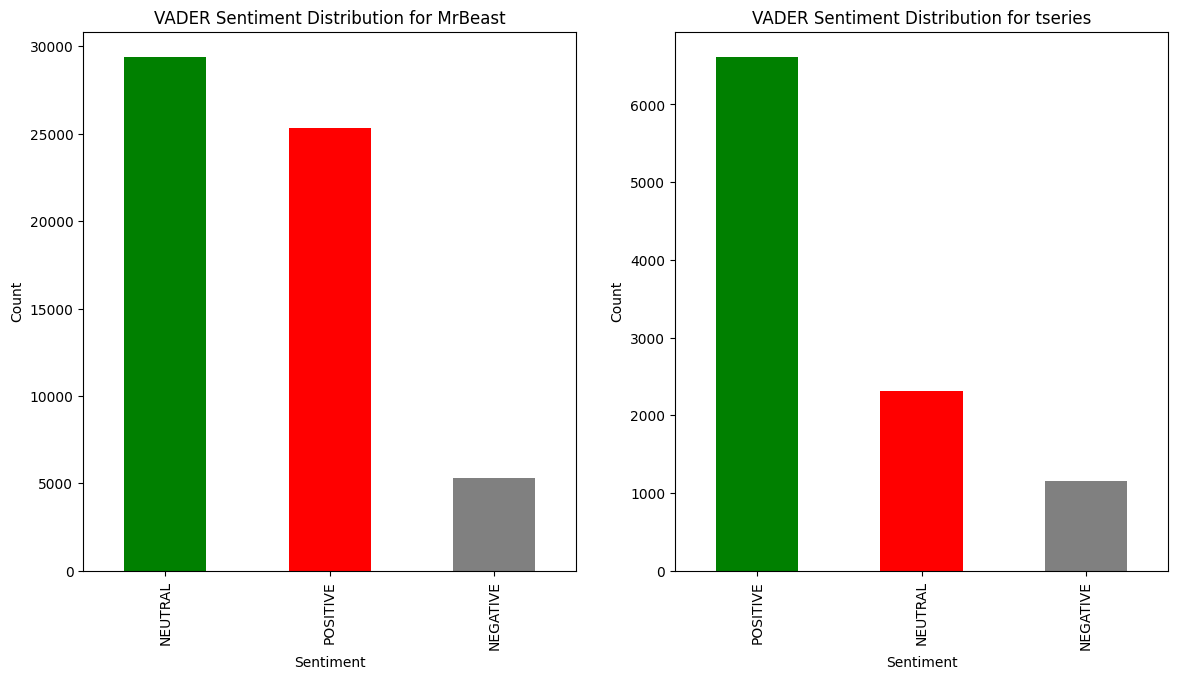

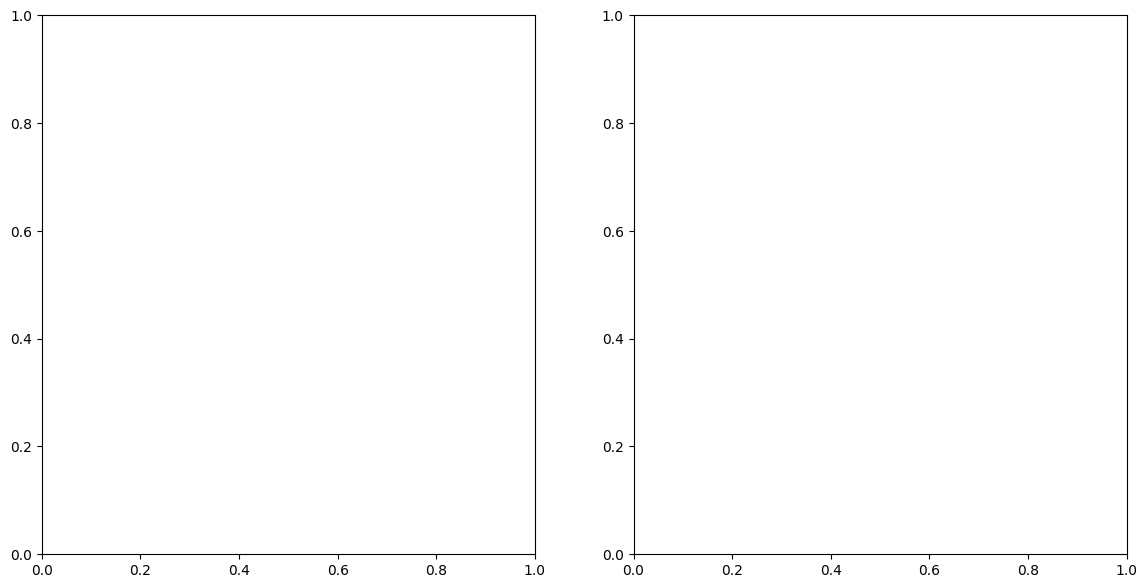

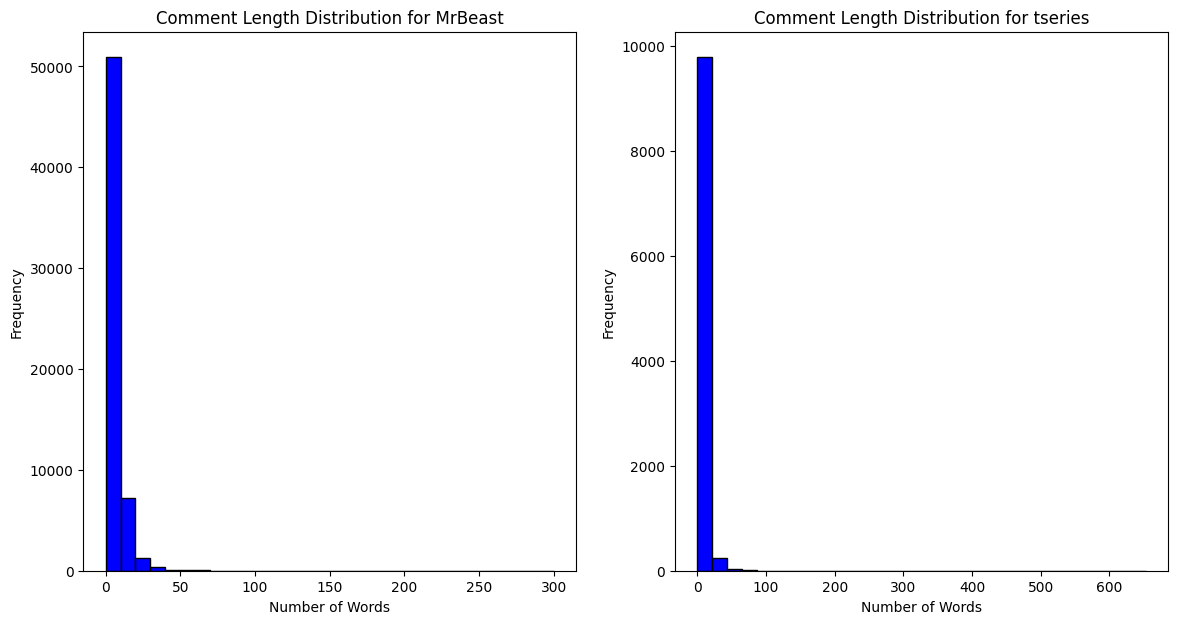

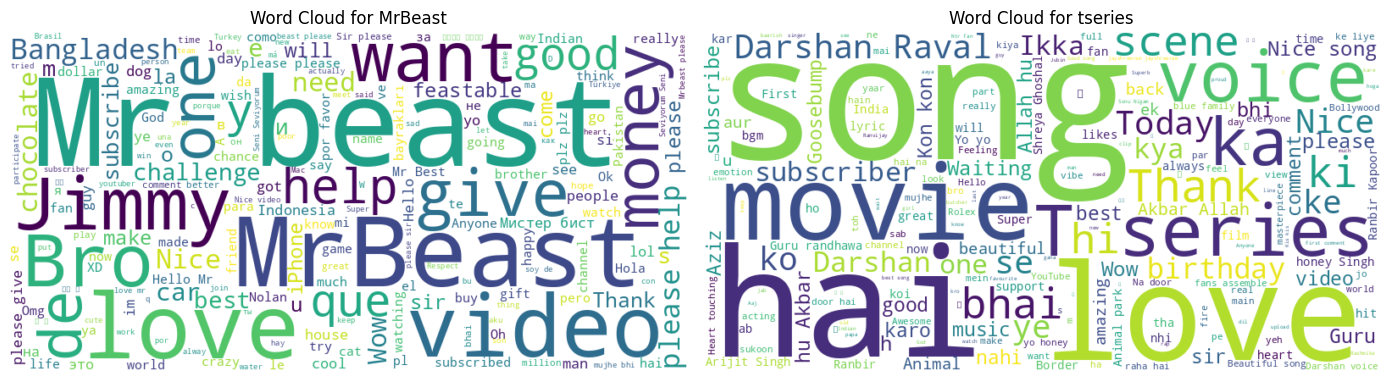

In [49]:
import os
import googleapiclient.discovery
import googleapiclient.errors
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline



# Initialize the sentiment analysis pipelines
vader_analyzer = SentimentIntensityAnalyzer()
huggingface_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

def get_channel_id(api_key, channel_name):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    request = youtube.search().list(
        part="snippet",
        q=channel_name,
        type="channel",
        maxResults=1
    )
    response = request.execute()
    if 'items' in response and len(response['items']) > 0:
        return response['items'][0]['id']['channelId']
    else:
        return None

def get_youtube_videos(api_key, channel_id, max_results=60):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    video_ids = []
    next_page_token = None

    while True:
        request = youtube.search().list(
            part="snippet",
            channelId=channel_id,
            maxResults=50,
            order="date",
            type="video",
            pageToken=next_page_token
        )
        response = request.execute()
        for item in response.get('items', []):
            video_ids.append(item['id']['videoId'])
        next_page_token = response.get('nextPageToken')
        if not next_page_token or len(video_ids) >= max_results:
            break

    return video_ids[:max_results]

def get_video_comments(api_key, video_id, max_results=1000):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    comments = []
    next_page_token = None

    while True:
        try:
            request = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                maxResults=100,
                textFormat="plainText",
                pageToken=next_page_token
            )
            response = request.execute()
            for item in response.get('items', []):
                comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
                comments.append(comment)
            next_page_token = response.get('nextPageToken')
            if not next_page_token or len(comments) >= max_results:
                break
        except googleapiclient.errors.HttpError as e:
            if e.resp.status == 403:
                print(f"Skipping video {video_id} due to comments being disabled.")
                break
            else:
                print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
                break

    print(f"Retrieved {len(comments)} comments for video {video_id}")
    return comments[:max_results]

def fetch_all_comments(api_key, channel_name):
    channel_id = get_channel_id(api_key, channel_name)
    if channel_id:
        video_ids = get_youtube_videos(api_key, channel_id)
        all_comments = []
        for video_id in video_ids:
            comments = get_video_comments(api_key, video_id)
            all_comments.extend(comments)
        print(f"Retrieved {len(all_comments)} comments for {channel_name}")
        return pd.DataFrame(all_comments, columns=['comment'])
    else:
        print(f"Channel {channel_name} not found.")
        return pd.DataFrame(columns=['comment'])

def perform_vader_sentiment_analysis(comments):
    sentiments = comments['comment'].apply(lambda x: vader_analyzer.polarity_scores(x))
    comments['vader_compound'] = sentiments.apply(lambda x: x['compound'])
    comments['vader_sentiment'] = sentiments.apply(lambda x: 'POSITIVE' if x['compound'] >= 0.05 else ('NEGATIVE' if x['compound'] <= -0.05 else 'NEUTRAL'))
    return comments

def perform_huggingface_sentiment_analysis(comments):
    try:
      hf_sentiments = huggingface_analyzer(comments['comment'].tolist())
      comments['hf_label'] = [s['label'] for s in hf_sentiments]
      comments['hf_score'] = [s['score'] for s in hf_sentiments]
    except Exception as e:
      print(f"Error performing Hugging Face sentiment analysis: {e}")
      comments['hf_label'] = None
      comments['hf_score'] = None
    return comments

def create_word_cloud(comments, ax, title):
    text = ' '.join(comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)

def plot_comment_length_distribution(ax, comments, channel_name):
    lengths = comments['comment'].apply(lambda x: len(x.split()))
    ax.hist(lengths, bins=30, color='blue', edgecolor='black')
    ax.set_title(f'Comment Length Distribution for {channel_name}')
    ax.set_xlabel('Number of Words')
    ax.set_ylabel('Frequency')

def plot_sentiment_distribution(ax, comments, column, channel_name, sentiment_type):
    sentiment_counts = comments[column].value_counts()
    sentiment_counts.plot(kind='bar', ax=ax, color=['green', 'red', 'gray'])
    ax.set_title(f'{sentiment_type} Sentiment Distribution for {channel_name}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

def main():
    # Fetch comments for both channels
    comments_channel1 = fetch_all_comments(api_key, Channel1)
    comments_channel2 = fetch_all_comments(api_key, Channel2)

    # Perform sentiment analysis using VADER
    comments_channel1 = perform_vader_sentiment_analysis(comments_channel1)
    comments_channel2 = perform_vader_sentiment_analysis(comments_channel2)

    # Perform sentiment analysis using Hugging Face model
    #comments_channel1 = perform_huggingface_sentiment_analysis(comments_channel1)
    #comments_channel2 = perform_huggingface_sentiment_analysis(comments_channel2)

    # Save DataFrames
    comments_channel1.to_csv(f"{Channel1}_comments.csv", index=False)
    comments_channel2.to_csv(f"{Channel2}_comments.csv", index=False)

    # Plotting
    fig, axs_wc = plt.subplots(1, 2, figsize=(14, 7))

    # VADER Sentiment distribution
    plot_sentiment_distribution(axs_wc[0], comments_channel1, 'vader_sentiment', Channel1, 'VADER')
    plot_sentiment_distribution(axs_wc[1], comments_channel2, 'vader_sentiment', Channel2, 'VADER')

    fig_wc, axs_wc = plt.subplots(1, 2, figsize=(14, 7))
    # Hugging Face Sentiment distribution
    #plot_sentiment_distribution(axs_wc[0], comments_channel1, 'hf_label', Channel1, 'Hugging Face')
    #plot_sentiment_distribution(axs_wc[1], comments_channel2, 'hf_label', Channel2, 'Hugging Face')

    fig_wc, axs_wc = plt.subplots(1, 2, figsize=(14, 7))
    # Comment length distribution
    plot_comment_length_distribution(axs_wc[0], comments_channel1, Channel1)
    plot_comment_length_distribution(axs_wc[1], comments_channel2, Channel2)

    # Word Clouds
    fig_wc, axs_wc = plt.subplots(1, 2, figsize=(14, 7))
    create_word_cloud(comments_channel1['comment'], axs_wc[0], f'Word Cloud for {Channel1}')
    create_word_cloud(comments_channel2['comment'], axs_wc[1], f'Word Cloud for {Channel2}')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


KeyError: 'hf_label'

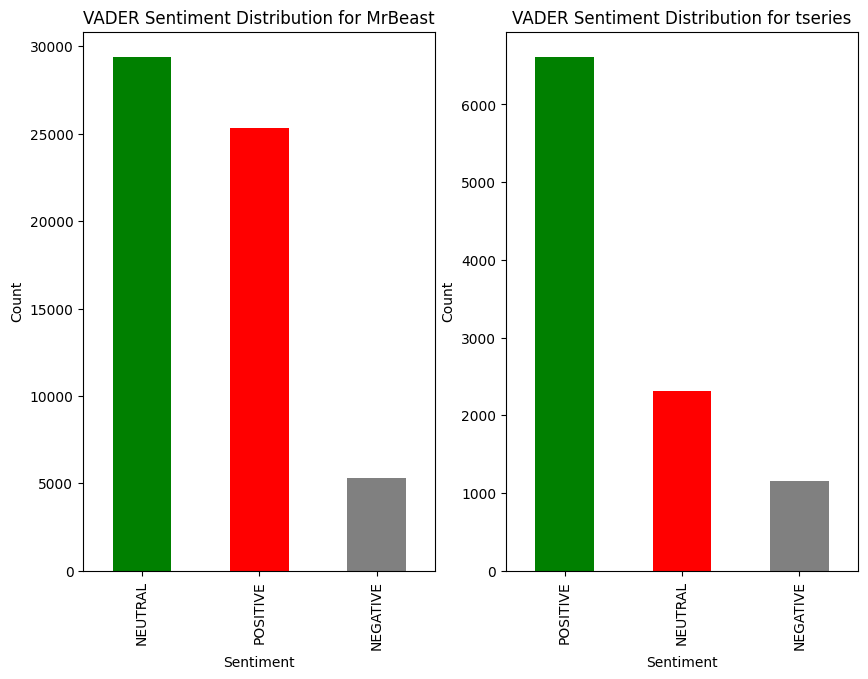

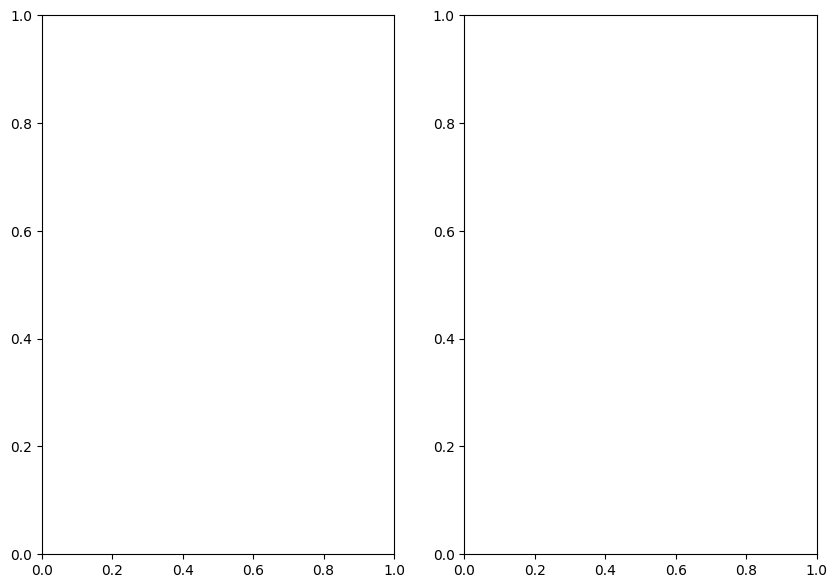

In [50]:
comments_channel1=pd.read_csv(Channel1+'_comments.csv')
comments_channel2=pd.read_csv(Channel2+'_comments.csv')
fig_wc, axs_wc = plt.subplots(1, 2, figsize=(10, 7))
    # VADER Sentiment distribution
plot_sentiment_distribution(axs_wc[0], comments_channel1, 'vader_sentiment', Channel1, 'VADER')
plot_sentiment_distribution(axs_wc[1], comments_channel2, 'vader_sentiment', Channel2, 'VADER')

fig_wc, axs_wc = plt.subplots(1, 2, figsize=(10, 7))
    # Hugging Face Sentiment distribution
plot_sentiment_distribution(axs_wc[0], comments_channel1, 'hf_label', Channel1, 'Hugging Face')
plot_sentiment_distribution(axs_wc[1], comments_channel2, 'hf_label', Channel2, 'Hugging Face')

fig_wc, axs_wc = plt.subplots(1, 2, figsize=(10, 7))
    # Comment length distribution
plot_comment_length_distribution(axs_wc[0], comments_channel1, Channel1)
plot_comment_length_distribution(axs_wc[1], comments_channel2, Channel2)

    # Word Clouds
fig_wc, axs_wc = plt.subplots(1, 2, figsize=(10, 7))
create_word_cloud(comments_channel1['comment'], axs_wc[0], f'Word Cloud for {Channel1}')
create_word_cloud(comments_channel2['comment'], axs_wc[1], f'Word Cloud for {Channel2}')

plt.tight_layout()
plt.show()

In [ ]:
# Initialize the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
def analyze_channel_comments_distilbert(api_key, channel_name):
    channel_id = get_channel_id(api_key, channel_name)
    if channel_id:
        video_ids = get_youtube_videos(api_key, channel_id)
        all_comments = []
        for video_id in video_ids:
            comments = get_video_comments(api_key, video_id)
            all_comments.extend(comments)
        sentiments, sentiment_scores = perform_sentiment_analysis(all_comments)
        return sentiments, sentiment_scores, all_comments
    else:
        print(f"Channel {channel_name} not found.")
        return None, None, None


# Example usage
if __name__ == "__main__":
    sentiments_channel1, sentiment_scores_channel1, comments_channel1 = analyze_channel_comments(api_key, Channel1)
    sentiments_channel2, sentiment_scores_channel2, comments_channel2 = analyze_channel_comments(api_key, Channel2)

    if sentiments_channel1 and sentiments_channel2:
        fig, axs = plt.subplots(3, 2, figsize=(14, 18))

        # Sentiment analysis plots
        plot_sentiment_analysis(axs[0, 0], sentiments_channel1, Channel1, len(comments_channel1))
        plot_sentiment_analysis(axs[0, 1], sentiments_channel2, Channel2, len(comments_channel2))

        # Adjust layout
        plt.tight_layout()
        plt.show()

        # Print summary
        print(f"{Channel1} - Total Comments: {len(comments_channel1)}")
        print(f"Positive: {sentiments_channel1['POSITIVE']}, Negative: {sentiments_channel1['NEGATIVE']}")

        print(f"{Channel2} - Total Comments: {len(comments_channel2)}")
        print(f"Positive: {sentiments_channel2['POSITIVE']}, Negative: {sentiments_channel2['NEGATIVE']}")
    else:
        print("Analysis could not be completed for one or both channels.")

# Transcription

In [ ]:
!pip install soundfile librosa

In [ ]:


# import os
# import csv
# import pandas as pd
# import speech_recognition as sr
# import soundfile as sf
# import librosa
# # Load the CSV data into dataframes
# rg_df = pd.read_csv('/content/rahul_gandhi_videos.csv')
# nm_df = pd.read_csv('/content/narendra_modi_videos.csv')

# # Initialize the speech recognizer
# recognizer = sr.Recognizer()

# def transcribe_audio(audio_path, language):
#     if(os.path.exists(audio_path)==False):
#         return "Audio file not found"
#     x, _ = librosa.load(audio_path, sr=16000)
#     sf.write('tmp.wav', x, 16000)
#     audio_path='tmp.wav'
#     if(language==None):
#         language="hi"
#     with sr.AudioFile(audio_path) as source:
#         audio = recognizer.listen(source)
#         try:
#             text = recognizer.recognize_google(audio, language=language)
#             return text
#         except sr.UnknownValueError:
#             return "Unable to recognize speech"
#         except sr.RequestError:
#             return "API unavailable"


# # Transcribe Rahul Gandhi videos
# for index, row in rg_df.iterrows():
#     audio_path = f'/content/rahul_gandhi_videos/{row["videoId"]}.wav'
#     language = row["defaultAudioLanguage"]
#     transcribed_text = transcribe_audio(audio_path, language)
#     rg_df.at[index, 'Transcribed_Text'] = transcribed_text

# # Transcribe Narendra Modi videos
# for index, row in nm_df.iterrows():
#     audio_path = f'/content/narendra_modi_videos/{row["videoId"]}.wav'
#     language = row["defaultAudioLanguage"]
#     transcribed_text = transcribe_audio(audio_path, language)
#     nm_df.at[index, 'Transcribed_Text'] = transcribed_text

# # Save the updated DataFrame to new CSV files
# rg_df.to_csv('/content/rahul_gandhi_videos_transcribed.csv', index=False)
# nm_df.to_csv('/content/narendra_modi_videos_transcribed.csv', index=False)

# print("Transcription completed and saved to CSV files.")


In [ ]:
 !pip install pydub SpeechRecognition

In [ ]:
!pip install SpeechRecognition


In [ ]:
import os
import csv
import pandas as pd
import SpeechRecognition as sr


# Initialize the speech recognizer
recognizer = sr.Recognizer()

def transcribe_audio(audio_path, language):
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio, language=language)
            return text
        except sr.UnknownValueError:
            return "Unable to recognize speech"
        except sr.RequestError:
            return "API unavailable"

# Transcribe Rahul Gandhi videos
for index, row in rg_df.iterrows():
    audio_path = f'/content/rahul_gandhi_videos/{row["videoId"]}.wav'
    language = row["defaultAudioLanguage"]
    transcribed_text = transcribe_audio(audio_path, language)
    rg_df.at[index, 'Transcribed_Text'] = transcribed_text

# Transcribe Narendra Modi videos
for index, row in nm_df.iterrows():
    audio_path = f'/content/narendra_modi_videos/{row["videoId"]}.wav'
    language = row["defaultAudioLanguage"]
    transcribed_text = transcribe_audio(audio_path, language)
    nm_df.at[index, 'Transcribed_Text'] = transcribed_text

# Save the updated DataFrame to new CSV files
rg_df.to_csv('/content/rahul_gandhi_videos_transcribed.csv', index=False)
nm_df.to_csv('/content/narendra_modi_videos_transcribed.csv', index=False)

print("Transcription completed and saved to CSV files.")


In [ ]:

# import pandas as pd
# from google.cloud import speech, translate_v2 as translate
# from textblob import TextBlob
# import os

# # Set up your Google Cloud credentials
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/youtube-speech-analysis-af2bc3be10f8.json'

# # Initialize the Google Cloud client
# speech_client = speech.SpeechClient()
# translate_client = translate.Client()

# # Load the metadata DataFrame
# rg_df = pd.read_csv('/content/rahul_gandhi_videos.csv')

# # Add new columns for transcribed text, translation, and sentiment
# rg_df['Transcribed_Text'] = ''
# rg_df['Translated_Text'] = ''
# rg_df['Sentiment'] = ''

# for index, row in rg_df.iterrows():
#     # Assuming the audio files are named after the videoId
#     audio_path = f'/content/rahul_gandhi_videos/{row["videoId"]}.mp3'

#     # Transcribe the audio file
#     with open(audio_path, 'rb') as audio_file:
#         audio_content = audio_file.read()

#     audio = speech.RecognitionAudio(content=audio_content)
#     config = speech.RecognitionConfig(
#         encoding=speech.RecognitionConfig.AudioEncoding.ENCODING_UNSPECIFIED,
#         language_code=row['defaultAudioLanguage']
#     )

#     response = speech_client.recognize(config=config, audio=audio)
#     transcription = ' '.join([result.alternatives[0].transcript for result in response.results])


#     # Translate the text to English
#     translation = translate_client.translate(transcription, target_language='en')
#     translated_text = translation['translatedText']
#     rg_df.at[index, 'Translated_Text'] = translated_text

#     # Perform sentiment analysis
#     sentiment = TextBlob(translated_text).sentiment.polarity
#     rg_df.at[index, 'Sentiment'] = sentiment

# # Save the updated DataFrame to a new CSV file
# rg_df.to_csv('/content/rahul_gandhi_videos_with_sentiment.csv', index=False)


In [ ]:
pip install SpeechRecognition


In [ ]:
pip install openai-whisper


In [ ]:
import whisper

# Load the model (you can choose from "tiny", "base", "small", "medium", "large")
model = whisper.load_model("base")

# Function to transcribe an audio file
def transcribe_audio(file_path):
    result = model.transcribe(file_path)
    return result['text']

# Example usage
audio_file_path = '/content/rahul_gandhi_videos/LAdtI115Kis.wav'  # Replace with the path to your audio file
transcription = transcribe_audio(audio_file_path)
print(transcription)


In [ ]:
pip install googletrans

In [ ]:

from googletrans import Translator
translator = Translator()

def translate_text(text, target_language):
    try:
        translation = translator.translate(text, dest=target_language)
        return translation.text
    except Exception as e:
        print(f"Error translating text: {e}")
        return None
translated_text = translate_text(transcription, target_language='en')
print("Translated Transcript:")
print(translated_text)


In [ ]:
translator.translate(transcription, dest='en').text

In [ ]:
transcription

# Video to audio to MuRIL Modelto classification

In [ ]:
!pip install SpeechRecognition
!pip install PyAudio

In [ ]:
!pip install pycopy-audioop

In [ ]:
!pip install indic-transliteration


In [ ]:

from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
transliterated_text = transliterate(text_output, sanscript.HINDI, sanscript.ITRANS)

print(transliterated_text)


In [ ]:
import wave
import audioop
import speech_recognition as sr

# Open the wave file
wav = wave.open('/content/rahul_gandhi_videos/5Jai7LLvoIY.wav', 'rb')

# Get the total number of frames
nframes = wav.getnframes()

# Get the number of channels (2 for stereo)
nchannels = wav.getnchannels()

# Get the sample width
sampwidth = wav.getsampwidth()

# Read the audio data
frames = wav.readframes(nframes)

# Check if the total number of frames is a multiple of the frame width
if nframes % (sampwidth * nchannels) != 0:
    # Calculate the number of frames to trim
    trim_size = nframes % (sampwidth * nchannels)
    # Trim the audio data
    frames = frames[:-trim_size]

# Now you can convert the audio to mono
mono_frames = audioop.tomono(frames, sampwidth, 1, 1)

# Save the mono audio to a new wave file
with wave.open('kuruvi_mono_audio_file.wav', 'wb') as mono_wav:
    mono_wav.setnchannels(1)
    mono_wav.setsampwidth(sampwidth)
    mono_wav.setframerate(wav.getframerate())
    mono_wav.writeframes(mono_frames)

# Close the original wave file
wav.close()

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Reading Mono Audio file as source
# listening the audio file and store in audio_text variable
with sr.AudioFile('kuruvi_mono_audio_file.wav') as source:
    # Record the audio data
    audio_text = r.record(source)

# Recognize the speech in the audio
try:
    # Using Google speech recognition
    text = r.recognize_google(audio_text, language="ta-IN")
    print("Text: " + text)
except sr.RequestError:
    # API was unreachable or unresponsive
    print("API unavailable")
except sr.UnknownValueError:
    # Speech was unintelligible
    print("Unable to recognize speech")


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import speech_recognition as sr

# Replace 'your_audio_file.wav' with the path to your audio file
audio_path = '/content/rahul_gandhi_videos/5Jai7LLvoIY.wav'
text_output=""
# Load your audio file
audio = AudioSegment.from_wav(audio_path)

# Split audio where the silence is 700ms or more and get chunks
chunks = split_on_silence(
    audio,
    min_silence_len=700,
    silence_thresh=audio.dBFS-14,
    keep_silence=700
)

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Process each chunk with speech recognition
for i, chunk in enumerate(chunks):
    # Export the audio chunk to a wav file
    chunk.export(f"chunk{i}.wav", format="wav")

    # Recognize the chunk
    with sr.AudioFile(f"chunk{i}.wav") as source:
        audio_listened = r.listen(source)

        # Try converting it to text
        try:
            text = r.recognize_google(audio_listened, language="hi-IN")
            text_output=text_output+" "+text
            print(f"Chunk {i}: {text}")
        except sr.UnknownValueError as e:
            print(f"Could not understand audio chunk {i}")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")


In [ ]:

import speech_recognition as sr

speech = sr.Recognizer()


with sr.AudioFile('/content/Ennodu Nee Irundhal - Jagan Krishnan.wav') as source:

    text = speech.listen(source)
    try:
        text_output = speech.recognize_google(text, language = "ta-IN") # By default, it converts the speech into english
        print('Converting speech into text ...')
        print(text_output)
    except:
         print('Sorry')

In [ ]:
from pydub import AudioSegment
from pydub.playback import play
audio_path="/content/rahul_gandhi_videos/5Jai7LLvoIY.wav"


import pydub

wav_file = pydub.AudioSegment.from_file(file=audio_path, format="wav")
louder_wav_file = wav_file + 10  # Increase volume by 10 dB
quieter_wav_file = wav_file - 5  # Decrease volume by 5 dB

# Play the modified files
play(louder_wav_file)
play(quieter_wav_file)


In [ ]:
import os

# Convert MP4 to WAV
command = "ffmpeg -i /content/rahul_gandhi_videos/g2EKxmNO8IM.mp4 audio.wav"
os.system(command)


In [ ]:
import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("audio.wav") as source:
    audio = recognizer.record(source, duration=120)  # Adjust duration as needed
    text = recognizer.recognize_google(audio)
    print("Transcription:")
    print(text)


In [ ]:
from moviepy.editor import VideoFileClip

# Replace 'your_video_file.mp4' with the path to your video file
video_path = '/content/rahul_gandhi_videos/5Jai7LLvoIY.mp4'
audio_path = 'output_audio.wav'

# Load the video file
video_clip = VideoFileClip(video_path)

# Extract the audio from the video clip
audio_clip = video_clip.audio

# Write the audio data to a WAV file
audio_clip.write_audiofile(audio_path, codec='pcm_s16le')

# Close the clips
audio_clip.close()
video_clip.close()


In [ ]:
from moviepy.editor import VideoFileClip
import os

def extract_audio_from_video(video_path, audio_output_path):
    try:
        # Load the video file
        video_clip = VideoFileClip(video_path)

        # Check if video_fps exists in the metadata
        if 'video_fps' not in video_clip.reader.infos:
            raise KeyError('video_fps')

        # Extract the audio from the video clip
        audio_clip = video_clip.audio

        # Write the audio data to a WAV file
        audio_clip.write_audiofile(audio_output_path, codec='pcm_s16le')

        # Close the clips
        audio_clip.close()
        video_clip.close()
        return True

    except KeyError:
        print(f"KeyError: 'video_fps' metadata not found in {video_path}.")
        return False
    except Exception as e:
        print(f"Error processing {video_path}: {e}")
        return False

# Example usage
video_path = '/content/rahul_gandhi_videos/z5fA-YZ_0Ao.mp4'
audio_output_path = '/content/rahul_gandhi_videos/z5fA-YZ_0Ao.wav'

if extract_audio_from_video(video_path, audio_output_path):
    print(f"Audio extracted successfully to {audio_output_path}")
else:
    print("Audio extraction failed.")


In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import speech_recognition as sr

text_output=""
# Load your audio file
audio = AudioSegment.from_wav(audio_path)

# Split audio where the silence is 700ms or more and get chunks
chunks = split_on_silence(
    audio,
    min_silence_len=700,
    silence_thresh=audio.dBFS-14,
    keep_silence=700
)

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

# Process each chunk with speech recognition
for i, chunk in enumerate(chunks):
    # Export the audio chunk to a wav file
    chunk.export(f"chunk{i}.wav", format="wav")

    # Recognize the chunk
    with sr.AudioFile(f"chunk{i}.wav") as source:
        audio_listened = r.listen(source)

        # Try converting it to text
        try:
            text = r.recognize_google(audio_listened, language="ta-IN")
            text_output=text_output+" "+text
            print(f"Chunk {i}: {text}")
        except sr.UnknownValueError as e:
            print(f"Could not understand audio chunk {i}")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")


In [ ]:
pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.utils import which

# Manually assign the path to the FFmpeg binary
AudioSegment.converter = which("ffmpeg")

# Now try loading your WAV file again
try:
    audio = AudioSegment.from_file("/content/rahul_gandhi_videos/EcLfYK_9srA.wav")
    print("Transcription successful!")
except Exception as e:
    print(f"Error: {e}")




In [ ]:
text_output

In [ ]:
import transformers
from transformers import pipeline

# Replace with the model name you choose from Hugging Face Hub/alternative model
model_name = "Hate-speech-CNERG/deoffxlmr-mono-tamil"  # Replace with appropriate model name

# Create a hate speech detection pipeline
try:
  hate_speech_detector = pipeline("sentiment-analysis", model=model_name)  # Adjust task if needed
except KeyError:
  print("Error: The specified task might not be supported by the chosen model.")
  # Handle the error gracefully, e.g., suggest alternative models or tasks




In [ ]:
# Input Tamil text
text = text_output  # Replace with your text

# Analyze the text
predictions = hate_speech_detector(text)

print(predictions)
# Check the results (adapt to model's output format)
if predictions[0]['label'] == 'Off_target_ind':  # Replace with actual labels for offensive/not offensive
  print("The text is likely offensive.")
else:
  print("The text is likely not offensive.")

In [ ]:
!pip install pytube

In [ ]:

from pytube import YouTube
from pytube.exceptions import AgeRestrictedError
from pytube.exceptions import LiveStreamError
def download_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path = os.path.join(output_path, f"{video_id}.wav")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.wav")
        print(f"Downloaded audio: {output_file_path}")
    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
    except LiveStreamError:
        print(f"Skipping download for LiveStreamError video: {video_id}")
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")




In [ ]:


import googleapiclient.discovery
import googleapiclient.errors
from pytube import YouTube
def get_channel_id(api_key, channel_name):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)

    # Search for channels based on the channel name
    request = youtube.search().list(
        part="snippet",
        q=channel_name,
        type="channel",
        maxResults=1
    )
    response = request.execute()

    if 'items' in response and len(response['items']) > 0:
        # Return the channel ID
        return response['items'][0]['id']['channelId']
    else:
        return None

def get_youtube_videos(api_key, channel_id, max_results=700):
    try:
        youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)

        # Fetch the video IDs first
        video_ids = []
        request = youtube.search().list(
            part="snippet",
            channelId=channel_id,
            maxResults=max_results,
            order="date",
            type="video"
        )
        response = request.execute()

        for item in response.get('items', []):
            video_ids.append(item['id']['videoId'])

        # Fetch video details using the video IDs
        video_data = []
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids)
        )
        response = request.execute()

        for item in response.get('items', []):
            high_quality_thumbnail_url = f"https://img.youtube.com/vi/{item['id']}/hqdefault.jpg"
            video_data.append({
                'videoId': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'publishedAt': item['snippet']['publishedAt'],
                'channelTitle': item['snippet']['channelTitle'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'defaultAudioLanguage': item['snippet'].get('defaultAudioLanguage', ''),
                'viewCount': item['statistics']['viewCount'],
                'likeCount': item['statistics'].get('likeCount', '0'),
                'dislikeCount': item['statistics'].get('dislikeCount', '0'),
                'commentCount': item['statistics'].get('commentCount', '0'),
                'highQualityThumbnail': high_quality_thumbnail_url,
                'ageRestricted': 'contentRating' in item['contentDetails'] and 'ytRating' in item['contentDetails']['contentRating']
            })
        return video_data

    except googleapiclient.errors.HttpError as e:
        print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
        return None






In [ ]:
import shutil
import os

if __name__ == "__main__":
  api_key =
  Channel1 = 'MrBeast'
  Channel2 = 'tseries'
  folder_path = '/content/'+Channel1+'_videos'
  if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
  folder_path = '/content/'+Channel2+'_videos'
  if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
  channel_id = get_channel_id(api_key, Channel1)
  if channel_id:
      print(f"Channel ID for {Channel1} is {channel_id}")
      ch1videos = get_youtube_videos(api_key, channel_id)
      for video in ch1videos:
          download_audio(video['videoId'], '/content/'+Channel1+'_videos/')
      #print("Iruku!!!!Ingaa Video Iruku" if rgvideos else "No videos found.")
  else:
      print("Channel not found.")


  channel_id = get_channel_id(api_key, Channel2)
  if channel_id:
      print(f"Channel ID for {Channel2} is {channel_id}")
      ch2videos = get_youtube_videos(api_key, channel_id)
      for video in ch2videos:
          download_audio(video['videoId'],  '/content/'+Channel2+'_videos/')
      #print("Iruku!!!!Ingaa Video Iruku" if nmvideos else "No videos found.")
  else:
      print("Channel not found.")

In [ ]:
import csv

In [ ]:
def write_videos_to_csv(file_name, videos):
    # Define the header
    headers = ['videoId', 'title', 'description', 'publishedAt', 'channelTitle', 'highQualityThumbnail','likeCount', 'tags', 'defaultAudioLanguage', 'dislikeCount', 'viewCount', 'commentCount', 'duration', 'ageRestricted']

    # Open the file in write mode
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)

        # Write the header
        writer.writeheader()

        # Write the video data
        for video in videos:
            writer.writerow(video)

# Call the function to write data to CSV files
write_videos_to_csv(Channel1+'_videos.csv', ch1videos)
write_videos_to_csv(Channel2+'_videos.csv', ch2videos)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ch1_df= pd.read_csv('/content/'+Channel1+'_videos.csv')
ch2_df= pd.read_csv('/content/'+Channel2+'_videos.csv')

In [ ]:
def analyze_color_scheme(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    colors = img.getcolors(img.size[0] * img.size[1])  # Remove the limit on the number of colors

    if colors:
        colors.sort(key=lambda tup: tup[0], reverse=True)
        color_frequency = [tup[0] for tup in colors]
        color_labels = [f'#{color[1][0]:02x}{color[1][1]:02x}{color[1][2]:02x}' for color in colors]

        plt.figure(figsize=(8, 6))
        plt.pie(color_frequency, labels=color_labels, colors=color_labels, startangle=90)
        plt.axis('equal')
        plt.show()
    else:
        print("No colors found in the image, or too many colors to analyze.")


In [ ]:
# for url in rg_df['highQualityThumbnail']:
#     analyze_color_scheme(url)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Function to get colors from an image URL
def get_colors(image_url, resize=150):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).resize((resize, resize))
    img = img.convert('RGB')
    colors = img.getcolors(resize*resize)
    colors = [color[1] for color in colors if color[1] != (0, 0, 0)]  # Exclude black
    return colors

# Function to perform k-means clustering on color data
def cluster_colors(color_list, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(color_list)
    centroids = kmeans.cluster_centers_
    return centroids

# Aggregate colors from nm_df and rg_df, excluding black
ch2_colors = np.vstack([get_colors(url) for url in ch2_df['highQualityThumbnail']])
ch1_colors = np.vstack([get_colors(url) for url in ch1_df['highQualityThumbnail']])

# Perform k-means clustering
ch2_centroids = cluster_colors(ch2_colors)
ch1_centroids = cluster_colors(ch1_colors)

# Plot the clustered colors for nm_df
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.pie([1]*len(ch2_centroids), colors=[f'#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}' for c in ch2_centroids], startangle=90)
plt.axis('equal')
plt.title('Clustered Color Scheme for thumbnails of '+ Channel2)

# Plot the clustered colors for rg_df
plt.subplot(1, 2, 2)
plt.pie([1]*len(ch1_centroids), colors=[f'#{int(c[0]):02x}{int(c[1]):02x}{int(c[2]):02x}' for c in ch1_centroids], startangle=90)
plt.axis('equal')
plt.title('Clustered Color Scheme for thumbnails of '+ Channel1)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming ch2_df and ch1_df are your DataFrames and they have 'viewCount', 'likeCount', and 'commentCount' columns

plt.figure(figsize=(10, 5))
# Plot like count against view count for rg_df
plt.scatter(ch1_df['viewCount'], ch1_df['likeCount'], color='blue',  label=Channel1, alpha=0.5)
# Plot like count against view count for ch2_df

plt.scatter(ch2_df['viewCount'], ch2_df['likeCount'], color='red',  label=Channel2, alpha=0.5)

# Adding titles and labels
plt.title('Like Count vs View Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.legend()
plt.show()

# Plot comment count against view count for nm_df
plt.figure(figsize=(10, 5))

# Plot comment count against view count for rg_df
plt.scatter(ch1_df['viewCount'], ch1_df['commentCount'], color='blue', label=Channel1, alpha=0.5)
plt.scatter(ch2_df['viewCount'], ch2_df['commentCount'], color='red', label=Channel2, alpha=0.5)

# Adding titles and labels
plt.title('Comment Count vs View Count')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.legend()
plt.show()


In [ ]:
# Convert 'publishedAt' to datetime
ch1_df['publishedAt'] = pd.to_datetime(ch1_df['publishedAt'])
ch2_df['publishedAt'] = pd.to_datetime(ch2_df['publishedAt'])

# Extract day
ch1_df['day'] = ch1_df['publishedAt'].dt.date
ch2_df['day'] = ch2_df['publishedAt'].dt.date

# Calculate upload frequency
ch1_upload_freq = ch1_df['day'].value_counts().sort_index()
ch2_upload_freq = ch2_df['day'].value_counts().sort_index()

# Plot upload frequency over time
plt.figure(figsize=(12, 6))
plt.plot(ch1_upload_freq, label=Channel1, color='blue')
plt.plot(ch2_upload_freq, label=Channel2, color='red')
plt.title('Upload Frequency Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Uploads')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
def convert_duration(duration):
    return pd.to_timedelta(duration)

ch1_df['duration'] = ch1_df['duration'].apply(convert_duration)
ch2_df['duration'] = ch2_df['duration'].apply(convert_duration)

plt.figure(figsize=(12, 6))
sns.histplot(ch1_df['duration'].dt.total_seconds()/60, bins=30, color='blue', label=Channel1, kde=True)
sns.histplot(ch2_df['duration'].dt.total_seconds()/60, bins=30, color='red', label=Channel2, kde=True)
plt.xlabel('Duration (minutes)')
plt.title('Video Duration Distribution')
plt.legend()
plt.show()


In [ ]:
ch1_df = ch1_df.sort_values('publishedAt')
ch2_df = ch2_df.sort_values('publishedAt')

ch1_df['cumulative_views'] = ch1_df['viewCount'].astype(int).cumsum()
ch2_df['cumulative_views'] = ch2_df['viewCount'].astype(int).cumsum()

plt.figure(figsize=(12, 6))
plt.plot(ch1_df['publishedAt'], ch1_df['cumulative_views'], label=Channel1, color='blue')
plt.plot(ch2_df['publishedAt'], ch2_df['cumulative_views'], label=Channel2, color='red')
plt.title('Cumulative Views Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Views')
plt.legend()
plt.show()


In [ ]:
def plot_comment_to_view_ratio(videos, channel_name):
    comment_to_view_ratio = videos['commentCount'] / videos['viewCount']
    plt.figure(figsize=(10, 6))
    sns.histplot(comment_to_view_ratio, bins=20, kde=True)
    plt.title(f'Comment-to-View Ratio for {channel_name}')
    plt.xlabel('Comment-to-View Ratio')
    plt.ylabel('Frequency')
    plt.show()

plot_comment_to_view_ratio(ch1_df, Channel1)
plot_comment_to_view_ratio(ch2_df, Channel2)


In [ ]:
def plot_upload_times(videos, channel_name):
    upload_times = pd.to_datetime(videos['publishedAt']).dt.hour
    plt.figure(figsize=(10, 6))
    sns.histplot(upload_times, bins=24, kde=True)
    plt.title(f'Distribution of Upload Times for {channel_name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency')
    plt.show()

plot_upload_times(ch1_df, Channel1)
plot_upload_times(ch2_df, Channel2)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Load the dataset
df = ch1_df
# Extract leading digits
df['LEADING_DIGIT'] = df['viewCount'].astype(str).str[0].astype(int)

# Ensure observed frequencies cover all leading digits from 1 to 9
observed_freq = observed_freq.reindex(range(1, 10), fill_value=0)

# Calculate z-score
obs_mean = observed_freq.mean()
obs_std = observed_freq.std()
z_score = (observed_freq - obs_mean) / obs_std

# Perform chi-square test
chi_sq, p_val = stats.chisquare(observed_freq, f_exp=expected_freq)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['LEADING_DIGIT'], bins=range(1, 11), align='left', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Leading Digits in View Counts')
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Z-score:\n{z_score}\n")
print(f"Chi-square value: {chi_sq}")
print(f"P-value: {p_val}")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Load the dataset
df = ch2_df

# Extract leading digits
df['LEADING_DIGIT'] = df['viewCount'].astype(str).str[0].astype(int)

# Calculate observed frequencies
observed_freq = df['LEADING_DIGIT'].value_counts(normalize=True).sort_index()

# Calculate expected frequencies according to Benford's Law
benfords_law = np.log10(1 + 1 / np.arange(1, 10))
expected_freq = pd.Series(benfords_law, index=range(1, 10))

# Calculate z-score
obs_mean = observed_freq.mean()
obs_std = observed_freq.std()
z_score = (observed_freq - obs_mean) / obs_std

# Perform chi-square test
chi_sq, p_val = stats.chisquare(observed_freq, f_exp=expected_freq)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['LEADING_DIGIT'], bins=range(1, 11), align='left', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Leading Digit')
plt.ylabel('Frequency')
plt.title('Distribution of Leading Digits in View Counts')
plt.xticks(range(1, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Z-score:\n{z_score}\n")
print(f"Chi-square value: {chi_sq}")
print(f"P-value: {p_val}")


In [ ]:
# Calculate z-score for view counts in ch1_df
mean_ch1 = ch1_df['viewCount'].mean()
std_ch1 = ch1_df['viewCount'].std()
ch1_df['viewCount_zscore'] = (ch1_df['viewCount'] - mean_ch1) / std_ch1

# Calculate z-score for view counts in ch2_df
mean_ch2 = ch2_df['viewCount'].mean()
std_ch2 = ch2_df['viewCount'].std()
ch2_df['viewCount_zscore'] = (ch2_df['viewCount'] - mean_ch2) / std_ch2

# Plot the distribution of z-scores for ch1_df and ch2_df
plt.figure(figsize=(12, 6))
plt.hist(ch1_df['viewCount_zscore'], bins=10, alpha=0.5, label=Channel1)
plt.hist(ch2_df['viewCount_zscore'], bins=10, alpha=0.5, label=Channel2)
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.title('Distribution of Z-scores for View Counts')
plt.legend()
plt.show()

In [ ]:
# Calculate growth rate for ch1_df
ch1_df['growth_rate'] = ch1_df['viewCount'].pct_change()

# Calculate growth rate for ch2_df
ch2_df['growth_rate'] = ch2_df['viewCount'].pct_change()

# Plot growth rates for comparison
plt.figure(figsize=(12, 6))
plt.plot(ch1_df['growth_rate'], label=Channel1)
plt.plot(ch2_df['growth_rate'], label=Channel2)
plt.xlabel('Video Index')
plt.ylabel('Growth Rate')
plt.title('Video View Count Growth Rates')
plt.legend()
plt.show()

#note it just shows the change if the view count is high and change is low it will be flat next graph will solve the huge variation


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot growth rates for ch1_df
axs[0].plot(ch1_df['growth_rate'], label=Channel1)
axs[0].set_title(Channel1+' Growth Rates')
axs[0].set_xlabel('Video Index')
axs[0].set_ylabel('Growth Rate')

# Plot growth rates for ch2_df
axs[1].plot(ch2_df['growth_rate'], label=Channel2)
axs[1].set_title(Channel2+' Growth Rates')
axs[1].set_xlabel('Video Index')
axs[1].set_ylabel('Growth Rate')

plt.tight_layout()
plt.show()


In [ ]:
!zip -r /content/rahul_gandhi_videos.zip /content/rahul_gandhi_videos

In [ ]:
from google.colab import files
files.download("/content/narendra_modi_videos.zip")
files.download("/content/rahul_gandhi_videos.zip")

In [ ]:
import os
import shutil
from pytube import YouTube
from pytube.exceptions import AgeRestrictedError
import googleapiclient.discovery
import googleapiclient.errors
import csv
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment

In [ ]:
def get_channel_id(api_key, channel_name):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    request = youtube.search().list(
        part="snippet",
        q=channel_name,
        type="channel",
        maxResults=1
    )
    response = request.execute()
    if 'items' in response and len(response['items']) > 0:
        return response['items'][0]['id']['channelId']
    else:
        return None

In [ ]:
def get_youtube_videos(api_key, channel_id, max_results=10):
    try:
        youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
        request = youtube.search().list(
            part="snippet",
            channelId=channel_id,
            maxResults=max_results,
            order="date",
            type="video"
        )
        response = request.execute()
        video_ids = [item['id']['videoId'] for item in response['items']]
        video_data = []
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids)
        )
        response = request.execute()
        for item in response['items']:
            video_data.append({
                'videoId': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'publishedAt': item['snippet']['publishedAt'],
                'channelTitle': item['snippet']['channelTitle'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'defaultAudioLanguage': item['snippet'].get('defaultAudioLanguage', ''),
                'viewCount': item['statistics']['viewCount'],
                'likeCount': item['statistics'].get('likeCount', '0'),
                'dislikeCount': item['statistics'].get('dislikeCount', '0'),
                'commentCount': item['statistics'].get('commentCount', '0'),
                'highQualityThumbnail': f"https://img.youtube.com/vi/{item['id']}/hqdefault.jpg"
            })
        return video_data
    except googleapiclient.errors.HttpError as e:
        print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
        return None


In [ ]:
# Function to download audio from YouTube video
def download_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path = os.path.join(output_path, f"{video_id}.wav")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.wav")
        print(f"Downloaded audio: {output_file_path}")
    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")

# Function to transcribe audio using SpeechRecognition
def transcribe_audio(audio_path, language):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio, language=language)
            return text
        except sr.UnknownValueError:
            return "Unable to recognize speech"
        except sr.RequestError:
            return "API unavailable"


In [ ]:
def write_videos_to_csv(file_name, videos):
    headers = ['videoId', 'title', 'description', 'publishedAt', 'channelTitle', 'highQualityThumbnail', 'likeCount', 'tags', 'defaultAudioLanguage', 'dislikeCount', 'viewCount', 'commentCount', 'duration']
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        for video in videos:
            writer.writerow(video)

# Remove existing directories if they exist
for folder in ['/content/narendra_modi_videos', '/content/rahul_gandhi_videos']:
    if os.path.exists(folder):
        shutil.rmtree(folder)


In [ ]:

channel_id = get_channel_id(api_key, Channel1)
if channel_id:
    ch1videos = get_youtube_videos(api_key, channel_id)
    if ch1videos:
        for video in ch1videos:
            download_audio(video['videoId'], '/content/'+Channel1+'_videos')
        write_videos_to_csv('rahul_gandhi_videos.csv', ch1videos)
    else:
        print("No videos found for Rahul Gandhi.")
else:
    print("Channel not found for Rahul Gandhi.")


channel_id = get_channel_id(api_key, Channel2)
if channel_id:
    nmvideos = get_youtube_videos(api_key, channel_id)
    if nmvideos:
        for video in nmvideos:
            download_audio(video['videoId'], '/content/'+Channel2+'_videos')
        write_videos_to_csv('narendra_modi_videos.csv', nmvideos)
    else:
        print("No videos found for Narendra Modi.")
else:
    print("Channel not found for Narendra Modi.")

# Load CSV data into DataFrames
rg_df = pd.read_csv('/content/ch1_videos.csv')
nm_df = pd.read_csv('/content/ch2_videos.csv')



In [ ]:
# Transcribe Rahul Gandhi videos
for index, row in rg_df.iterrows():
    audio_path = f'/content/rahul_gandhi_videos/{row["videoId"]}.wav'
    language = row.get("defaultAudioLanguage", "en")
    transcribed_text = transcribe_audio(audio_path, language)
    rg_df.at[index, 'Transcribed_Text'] = transcribed_text

# Transcribe Narendra Modi videos
for index, row in nm_df.iterrows():
    audio_path = f'/content/narendra_modi_videos/{row["videoId"]}.wav'
    language = row.get("defaultAudioLanguage", "en")
    transcribed_text = transcribe_audio(audio_path, language)
    nm_df.at[index, 'Transcribed_Text'] = transcribed_text

# Save transcribed data to new CSV files
rg_df.to_csv('/content/rahul_gandhi_videos_transcribed.csv', index=False)
nm_df.to_csv('/content/narendra_modi_videos_transcribed.csv', index=False)

print("Transcription completed and saved to CSV files.")

In [ ]:
import os
from pytube import YouTube
from pytube.exceptions import AgeRestrictedError
from pydub import AudioSegment

def download_and_convert_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path_mp4 = os.path.join(output_path, f"{video_id}.mp4")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.mp4")
        print(f"Downloaded audio: {output_file_path_mp4}")

        # Convert mp4 to wav
        output_file_path_wav = os.path.join(output_path, f"{video_id}.wav")
        audio = AudioSegment.from_file(output_file_path_mp4)
        audio.export(output_file_path_wav, format="wav")
        print(f"Converted audio to WAV: {output_file_path_wav}")

    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")

# Example usage for Rahul Gandhi's videos
for video in rgvideos:
    download_and_convert_audio(video['videoId'], '/content/rahul_gandhi_videos/')

# Example usage for Narendra Modi's videos
for video in nmvideos:
    download_and_convert_audio(video['videoId'], '/content/narendra_modi_videos/')


In [ ]:
!pip install pydub
!apt-get install ffmpeg


In [ ]:
import speech_recognition as sr

# Initialize the speech recognizer
recognizer = sr.Recognizer()

def transcribe_audio(audio_path, language):
    if(audio_path == True )
      with sr.AudioFile(audio_path) as source:
          audio = recognizer.listen(source)
          try:
             text = recognizer.recognize_google(audio, language=language)
             return text
          except sr.UnknownValueError:
              return "Unable to recognize speech"
          except sr.RequestError:
              return "API unavailable"

# Transcribe Rahul Gandhi videos
for index, row in rg_df.iterrows():
    audio_path = f'/content/rahul_gandhi_videos/{row["videoId"]}.wav'
    language = row["defaultAudioLanguage"]
    transcribed_text = transcribe_audio(audio_path, language)
    rg_df.at[index, 'Transcribed_Text'] = transcribed_text

# Transcribe Narendra Modi videos
for index, row in nm_df.iterrows():
    audio_path = f'/content/narendra_modi_videos/{row["videoId"]}.wav'
    language = row["defaultAudioLanguage"]
    transcribed_text = transcribe_audio(audio_path, language)
    nm_df.at[index, 'Transcribed_Text'] = transcribed_text

# Save the updated DataFrame to new CSV files
rg_df.to_csv('/content/rahul_gandhi_videos_transcribed.csv', index=False)
nm_df.to_csv('/content/narendra_modi_videos_transcribed.csv', index=False)

print("Transcription completed and saved to CSV files.")


In [ ]:
import os
import shutil
from pytube import YouTube
from pytube.exceptions import AgeRestrictedError
from pydub import AudioSegment
import speech_recognition as sr
import pandas as pd
import googleapiclient.discovery
import googleapiclient.errors

# Ensure Pydub dependencies are installed
!apt-get install ffmpeg -y
!pip install pydub

# Clear previous directories
shutil.rmtree('/content/narendra_modi_videos', ignore_errors=True)
shutil.rmtree('/content/rahul_gandhi_videos', ignore_errors=True)

def download_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path_mp4 = os.path.join(output_path, f"{video_id}.mp4")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.mp4")
        print(f"Downloaded audio: {output_file_path_mp4}")
        return output_file_path_mp4
    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
        return None
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")
        return None
    except Exception as e:
        print(f"Error downloading video {video_id}: {e}")
        return None

def convert_to_wav(mp4_path, output_path):
    try:
        wav_path = os.path.splitext(mp4_path)[0] + '.wav'
        audio = AudioSegment.from_file(mp4_path)
        audio.export(wav_path, format='wav')
        print(f"Converted to WAV: {wav_path}")
        return wav_path
    except Exception as e:
        print(f"Error converting {mp4_path} to WAV: {e}")
        return None

def get_channel_id(api_key, channel_name):
    youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
    request = youtube.search().list(
        part="snippet",
        q=channel_name,
        type="channel",
        maxResults=1
    )
    response = request.execute()

    if 'items' in response and len(response['items']) > 0:
        return response['items'][0]['id']['channelId']
    else:
        return None

def get_youtube_videos(api_key, channel_id, max_results=10):
    try:
        youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=api_key)
        video_ids = []
        request = youtube.search().list(
            part="snippet",
            channelId=channel_id,
            maxResults=max_results,
            order="date",
            type="video"
        )
        response = request.execute()

        for item in response.get('items', []):
            video_ids.append(item['id']['videoId'])

        video_data = []
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids)
        )
        response = request.execute()

        for item in response.get('items', []):
            high_quality_thumbnail_url = f"https://img.youtube.com/vi/{item['id']}/hqdefault.jpg"
            video_data.append({
                'videoId': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'publishedAt': item['snippet']['publishedAt'],
                'channelTitle': item['snippet']['channelTitle'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'defaultAudioLanguage': item['snippet'].get('defaultAudioLanguage', ''),
                'viewCount': item['statistics']['viewCount'],
                'likeCount': item['statistics'].get('likeCount', '0'),
                'dislikeCount': item['statistics'].get('dislikeCount', '0'),
                'commentCount': item['statistics'].get('commentCount', '0'),
                'highQualityThumbnail': high_quality_thumbnail_url
            })
        return video_data

    except googleapiclient.errors.HttpError as e:
        print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
        return None

def process_videos(username, folder_name):
    channel_id = get_channel_id(api_key, username)
    if channel_id:
        print(f"Channel ID for {username} is {channel_id}")
        videos = get_youtube_videos(api_key, channel_id)
        for video in videos:
            mp4_file_path = download_audio(video['videoId'], f'/content/{folder_name}/')
            if mp4_file_path:
                convert_to_wav(mp4_file_path, f'/content/{folder_name}/')
    else:
        print("Channel not found.")

def transcribe_audio(audio_path, language):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio, language=language)
            return text
        except sr.UnknownValueError:
            return "Unable to recognize speech"
        except sr.RequestError:
            return "API unavailable"

def add_transcriptions(df, folder_name):
    df['Transcribed_Text'] = ""
    for index, row in df.iterrows():
        audio_path = f'/content/{folder_name}/{row["videoId"]}.wav'
        if os.path.exists(audio_path):
            language = row["defaultAudioLanguage"] if "defaultAudioLanguage" in row else "en-US"
            transcribed_text = transcribe_audio(audio_path, language)
            df.at[index, 'Transcribed_Text'] = transcribed_text
        else:
            df.at[index, 'Transcribed_Text'] = "File not found"
    return df

# Example usage to process videos for both channels
process_videos('rahulgandhi', 'rahul_gandhi_videos')
process_videos('NarendraModi', 'narendra_modi_videos')


In [ ]:
import shutil
import os
from pytube import YouTube
from pytube.exceptions import AgeRestrictedError
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import csv
import pandas as pd
import speech_recognition as sr
from pydub import AudioSegment

# Ensure Pydub dependencies are installed
!apt-get install ffmpeg -y
!pip install pydub

# Define folder paths
folder_paths = ['/content/narendra_modi_videos', '/content/rahul_gandhi_videos']

# Delete folders if they exist
for folder_path in folder_paths:
    shutil.rmtree(folder_path, ignore_errors=True)

def download_audio(video_id, output_path):
    try:
        os.makedirs(output_path, exist_ok=True)
        yt = YouTube(f'https://www.youtube.com/watch?v={video_id}')
        audio_stream = yt.streams.filter(only_audio=True).first()
        output_file_path_mp4 = os.path.join(output_path, f"{video_id}.mp4")
        audio_stream.download(output_path=output_path, filename=f"{video_id}.mp4")
        print(f"Downloaded audio: {output_file_path_mp4}")
        return output_file_path_mp4
    except AgeRestrictedError:
        print(f"Skipping download for age-restricted video: {video_id}")
        return None
    except KeyError as e:
        print(f"Skipping download due to missing key in response: {e}")
        return None
    except Exception as e:
        print(f"Error downloading video {video_id}: {e}")
        return None

def convert_to_wav(mp4_path):
    try:
        wav_path = os.path.splitext(mp4_path)[0] + '.wav'
        audio = AudioSegment.from_file(mp4_path)
        audio.export(wav_path, format='wav')
        print(f"Converted to WAV: {wav_path}")
        return wav_path
    except Exception as e:
        print(f"Error converting {mp4_path} to WAV: {e}")
        return None

def get_channel_id(api_key, channel_name):
    youtube = build('youtube', 'v3', developerKey=api_key)
    request = youtube.search().list(
        part="snippet",
        q=channel_name,
        type="channel",
        maxResults=1
    )
    response = request.execute()
    if 'items' in response and len(response['items']) > 0:
        return response['items'][0]['id']['channelId']
    else:
        return None

def get_youtube_videos(api_key, channel_id, max_results=10):
    try:
        youtube = build('youtube', 'v3', developerKey=api_key)
        video_ids = []
        request = youtube.search().list(
            part="snippet",
            channelId=channel_id,
            maxResults=max_results,
            order="date",
            type="video"
        )
        response = request.execute()
        for item in response.get('items', []):
            video_ids.append(item['id']['videoId'])

        video_data = []
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids)
        )
        response = request.execute()
        for item in response.get('items', []):
            high_quality_thumbnail_url = f"https://img.youtube.com/vi/{item['id']}/hqdefault.jpg"
            video_data.append({
                'videoId': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'publishedAt': item['snippet']['publishedAt'],
                'channelTitle': item['snippet']['channelTitle'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'defaultAudioLanguage': item['snippet'].get('defaultAudioLanguage', ''),
                'viewCount': item['statistics']['viewCount'],
                'likeCount': item['statistics'].get('likeCount', '0'),
                'dislikeCount': item['statistics'].get('dislikeCount', '0'),
                'commentCount': item['statistics'].get('commentCount', '0'),
                'highQualityThumbnail': high_quality_thumbnail_url
            })
        return video_data
    except HttpError as e:
        print(f"An HTTP error occurred: {e.resp.status} - {e.content}")
        return None

def write_videos_to_csv(file_name, videos):
    headers = ['videoId', 'title', 'description', 'publishedAt', 'channelTitle', 'highQualityThumbnail', 'likeCount', 'tags', 'defaultAudioLanguage', 'dislikeCount', 'viewCount', 'commentCount', 'duration']
    with open(file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=headers)
        writer.writeheader()
        for video in videos:
            writer.writerow(video)

# Example usage
api_key =
# Download and process Rahul Gandhi videos
username = 'rahulgandhi'
channel_id = get_channel_id(api_key, username)
if channel_id:
    print(f"Channel ID for {username} is {channel_id}")
    rgvideos = get_youtube_videos(api_key, channel_id)
    if rgvideos:
        for video in rgvideos:
            mp4_path = download_audio(video['videoId'], '/content/rahul_gandhi_videos/')
            if mp4_path:
                convert_to_wav(mp4_path)
        write_videos_to_csv('rahul_gandhi_videos.csv', rgvideos)
    else:
        print("No videos found.")
else:
    print("Channel not found.")

# Download and process Narendra Modi videos
username = 'NarendraModi'
channel_id = get_channel_id(api_key, username)
if channel_id:
    print(f"Channel ID for {username} is {channel_id}")
    nmvideos = get_youtube_videos(api_key, channel_id)
    if nmvideos:
        for video in nmvideos:
            mp4_path = download_audio(video['videoId'], '/content/narendra_modi_videos/')
            if mp4_path:
                convert_to_wav(mp4_path)
        write_videos_to_csv('narendra_modi_videos.csv', nmvideos)
    else:
        print("No videos found.")
else:
    print("Channel not found.")

# Transcribe audio files
def transcribe_audio(audio_path, language):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.listen(source)
        try:
            text = recognizer.recognize_google(audio, language=language)
            return text
        except sr.UnknownValueError:
            return "Unable to recognize speech"
        except sr.RequestError:
            return "API unavailable"



In [ ]:
# Load the CSV data into dataframes
rg_df = pd.read_csv('/content/rahul_gandhi_videos.csv')
nm_df = pd.read_csv('/content/narendra_modi_videos.csv')

# Transcribe Rahul Gandhi videos
for index, row in rg_df.iterrows():
    audio_path = f'/content/rahul_gandhi_videos/{row["videoId"]}.wav'
    if os.path.exists(audio_path):
        language = row.get("defaultAudioLanguage", "en")
        transcribed_text = transcribe_audio(audio_path, language)
        print(transcribed_text)
        rg_df.at[index, 'Transcribed_Text'] = transcribed_text

# Transcribe Narendra Modi videos
for index, row in nm_df.iterrows():
    audio_path = f'/content/narendra_modi_videos/{row["videoId"]}.wav'
    if os.path.exists(audio_path):
        language = row.get("defaultAudioLanguage")
        print(type(language))
        if isinstance(language, float):
            continue
        transcribed_text = transcribe_audio(audio_path, language)
        nm_df.at[index, 'Transcribed_Text'] = transcribed_text



# Save the updated DataFrame to new CSV files
rg_df.to_csv('/content/rahul_gandhi_videos_transcribed.csv', index=False)
nm_df.to_csv('/content/narendra_modi_videos_transcribed.csv', index=False)

print("Transcription completed and saved to CSV files.")



In [ ]:
nm_df

In [ ]:
rg_df.head()

In [ ]:
!zip -r /content/MrBeast_videos.zip /content/MrBeast_videos

In [ ]:
!zip all.zip *

In [ ]:
!zip -r /content/tseries_videos.zip /content/tseries_videos

In [ ]:
from google.colab import files
files.download('/content/MrBeast_videos.zip')


In [ ]:
ch1_df.to_csv("ch1_df.csv")
ch2_df.to_csv("ch2_df.csv")